# 3.Pre-processing and Training Data Development

The enclosed represents Chapter 16.3 of the Springboard Data Scientist Career Track. The structure is as follows:
   * Creating Dummy Variables
   * Splitting the Data into Training & Testing subsets for Machine Learning
   * Standardized Scaling

I hope this submission shows that I understand when to apply the proper steps.

This code is built in Jupyter Notebook & uploaded on Github.


# Pre work

**Importing the relevant libraries to start**

In [1]:
#Import the necessary tools required in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np


# 3.1 Reassessing the input

We will import the dataframe from the previous Exploratory Data Analysis ( EDA ) section.

In [2]:
cd

C:\Users\rands


In [3]:
df = pd.read_csv('./_Capstone_One_Inflation/data/1.0_MAIN/QonQ_main_roll.csv')

As a reminder, the dataframe is composed of a quarterly change ( back ) on both `Inflation` & the Variables. The variables, however, are taking a rolling average. The rational is based on the idea that one of the variables may have had a bad day / week at the end of their respective term. If so, they may not properly display the impact they may have had on `Inflation`.

`Inflation` on the other hand, was moderately scraped in one Z-score round.

In [4]:
df.head()

,Date,Inflation,Wages CPI,WTI,Copper,Soybeans,Natural Gas,Heating Oil,Corn,Wheat,...,Lean Hogs,Sugar,Lumber,Capacity Utilization,GDP,M2 Velocity,PMI,USD Index,Initial Jobless Claims,Unemployment Rate
0,2021-02-28 00:00:00,0.501,0.007630,0.294725,0.182753,0.235484,0.039364,0.362725,0.267969,0.081492,...,0.071797,0.153711,0.364326,0.019749,0.015004,-0.012195,2.600000,-0.028476,32916.66667,-0.733333
1,2021-01-31 00:00:00,0.218,0.006251,0.133619,0.149469,0.247356,0.133913,0.212935,0.244380,0.075828,...,0.083947,0.167539,0.119677,0.026555,0.015004,-0.012195,2.266667,-0.021939,-17083.33333,-1.133333
2,2020-12-31 00:00:00,-0.009,0.006591,0.045217,0.110950,0.212504,0.331085,0.075287,0.227807,0.121747,...,0.251831,0.183723,0.017824,0.022883,0.015004,-0.012195,4.000000,-0.020209,-234000.00000,-2.033333
3,2020-11-30 00:00:00,-0.135,0.009198,0.012381,0.111624,0.189713,0.400814,-0.024694,0.194635,0.137836,...,0.340989,0.145086,0.352576,0.030228,0.015004,-0.012195,3.566667,-0.022875,-412333.33330,-2.766667
4,2020-10-31 00:00:00,0.196,0.012842,0.268018,0.150999,0.135852,0.421347,0.081213,0.128424,0.112240,...,0.221210,0.164845,0.733392,0.063448,0.015004,-0.012195,7.033333,-0.042067,-604333.33330,-3.833333


Per below, they have been scraped ( i.e. no null values ) & they all came in from the the API as floats ( which we want ). The `Date` is the only non-float variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    312 non-null    object 
 1   Inflation               312 non-null    float64
 2   Wages CPI               312 non-null    float64
 3   WTI                     312 non-null    float64
 4   Copper                  312 non-null    float64
 5   Soybeans                312 non-null    float64
 6   Natural Gas             312 non-null    float64
 7   Heating Oil             312 non-null    float64
 8   Corn                    312 non-null    float64
 9   Wheat                   312 non-null    float64
 10  Cattle                  312 non-null    float64
 11  Lean Hogs               312 non-null    float64
 12  Sugar                   312 non-null    float64
 13  Lumber                  312 non-null    float64
 14  Capacity Utilization    312 non-null    fl

In [6]:
df.shape

(312, 21)

In [7]:
df.describe()

,Inflation,Wages CPI,WTI,Copper,Soybeans,Natural Gas,Heating Oil,Corn,Wheat,Cattle,Lean Hogs,Sugar,Lumber,Capacity Utilization,GDP,M2 Velocity,PMI,USD Index,Initial Jobless Claims,Unemployment Rate
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,3.120000e+02,312.000000
mean,-0.030804,0.005489,0.020214,0.019810,0.012885,0.035417,0.019414,0.014929,0.016604,0.006404,0.018066,0.019915,0.028027,-0.000384,0.010657,-0.004439,0.073184,0.000752,3.685096e+03,0.006090
std,0.827474,0.005800,0.150741,0.120212,0.098168,0.197019,0.137546,0.122589,0.109806,0.066072,0.140843,0.147224,0.157614,0.017885,0.014045,0.022552,2.960773,0.034428,3.034924e+05,0.880617
min,-4.846000,-0.034864,-0.528002,-0.490200,-0.327256,-0.378821,-0.456848,-0.340215,-0.299369,-0.209991,-0.322853,-0.362170,-0.318534,-0.128528,-0.094662,-0.200725,-11.833333,-0.072180,-2.430333e+06,-4.266667
25%,-0.387750,0.003967,-0.057181,-0.050026,-0.041698,-0.088850,-0.050995,-0.056145,-0.055938,-0.039485,-0.075435,-0.080698,-0.073570,-0.004309,0.008557,-0.007373,-1.700000,-0.024314,-9.958333e+03,-0.200000
50%,-0.025500,0.006300,0.025297,0.009065,0.006706,0.007933,0.020651,0.005665,0.006844,0.011647,0.007895,-0.010051,0.016908,0.001742,0.011626,-0.002556,-0.100000,0.000669,-2.625000e+03,-0.066667
75%,0.333250,0.008169,0.115388,0.086206,0.061490,0.157548,0.104415,0.076297,0.078351,0.055361,0.113479,0.100615,0.112200,0.006261,0.014817,0.003964,1.675000,0.021954,5.166667e+03,0.066667
max,4.007000,0.023370,0.586463,0.496467,0.288663,0.629854,0.362725,0.475869,0.443412,0.165321,0.376706,0.604139,0.931183,0.096035,0.084535,0.040798,10.666667,0.118429,3.365750e+06,9.266667


# 3.2 Creating Dummy Variables

In [8]:
df_dummies = pd.get_dummies( df, columns=['Inflation'], prefix='D' )

In [9]:
df_dummies.head(2)

,Date,Wages CPI,WTI,Copper,Soybeans,Natural Gas,Heating Oil,Corn,Wheat,Cattle,...,D_1.4609999999999999,D_1.5290000000000001,D_1.5319999999999998,D_1.663,D_1.9140000000000001,D_2.157,D_2.336,D_2.8089999999999997,D_3.322,D_4.007
0,2021-02-28 00:00:00,0.007630,0.294725,0.182753,0.235484,0.039364,0.362725,0.267969,0.081492,0.056126,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-31 00:00:00,0.006251,0.133619,0.149469,0.247356,0.133913,0.212935,0.244380,0.075828,0.052881,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.head()

,Date,Inflation,Wages CPI,WTI,Copper,Soybeans,Natural Gas,Heating Oil,Corn,Wheat,...,Lean Hogs,Sugar,Lumber,Capacity Utilization,GDP,M2 Velocity,PMI,USD Index,Initial Jobless Claims,Unemployment Rate
0,2021-02-28 00:00:00,0.501,0.007630,0.294725,0.182753,0.235484,0.039364,0.362725,0.267969,0.081492,...,0.071797,0.153711,0.364326,0.019749,0.015004,-0.012195,2.600000,-0.028476,32916.66667,-0.733333
1,2021-01-31 00:00:00,0.218,0.006251,0.133619,0.149469,0.247356,0.133913,0.212935,0.244380,0.075828,...,0.083947,0.167539,0.119677,0.026555,0.015004,-0.012195,2.266667,-0.021939,-17083.33333,-1.133333
2,2020-12-31 00:00:00,-0.009,0.006591,0.045217,0.110950,0.212504,0.331085,0.075287,0.227807,0.121747,...,0.251831,0.183723,0.017824,0.022883,0.015004,-0.012195,4.000000,-0.020209,-234000.00000,-2.033333
3,2020-11-30 00:00:00,-0.135,0.009198,0.012381,0.111624,0.189713,0.400814,-0.024694,0.194635,0.137836,...,0.340989,0.145086,0.352576,0.030228,0.015004,-0.012195,3.566667,-0.022875,-412333.33330,-2.766667
4,2020-10-31 00:00:00,0.196,0.012842,0.268018,0.150999,0.135852,0.421347,0.081213,0.128424,0.112240,...,0.221210,0.164845,0.733392,0.063448,0.015004,-0.012195,7.033333,-0.042067,-604333.33330,-3.833333


While we knew going into the process that the entire data set is composed of "non categorical" data, notably floats, we undertook dummy variable creation process to double confirm.

**We will proceed forward without the dummy variables.**

# 3.3 Split data into training and testing subsets

We will now undertake the train / test split. Please note, there are three ( 3 ) scaling approaches ( next section ). Therefore, we will do one ( 1 ) main split but assign the `Train` & `Test` splits to each of the scaling approaches individually; in other words, each one will have its own data frame.

Listed below is a summary of the scaling names, the approach & the name of the respective data frames which we will formalize in the next section. Each will have a train test split formalized here:

   * **Standardization**
      * This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves
      * Data Frame Name  |  `_SS`   
   * **MinMaxScaler** ( often called Normalization )
      * This approach reassigns the values from 0 -> 1
      * Data Frame Name  |  `_MM`
   * **Log Transformation**
      * This approach usually is used with data that has long tails
      * Data Frame Name  |  `_LG`

The creation of these train / test splits will start here but before we proceed we will need to import the necessary libraries.

In [11]:
# from library.sb_utils import save_file
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression


**Train test split**

To begin, let's see what a `70% / 30% Train/Test Split` looks like.

In [12]:
print(' Train |', round(len(df)* 0.7,2), '\n','Test  |', len(df) * 0.3)

 Train | 218.4 
 Test  | 93.6


Now we have a reference to what the output should look like above. We will now split the data removing `Inflation` as that's the dependant variable.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Inflation'),
                                                    df.Inflation, test_size=0.3,
                                                    random_state=42
                                                   )

In [14]:
X_train.shape, X_test.shape

((218, 20), (94, 20))

In [15]:
y_train.shape, y_test.shape

((218,), (94,))

The above align with the previous review so we will proceed. We will need to remove `Date` as that's not something we will use in our model.

In [16]:
date_list = ['Date']
date_train = X_train[['Date']]
date_test = X_train[['Date']]

X_train.drop(columns=date_list, inplace=True)
X_test.drop(columns=date_list, inplace=True)
X_train.shape, X_test.shape

((218, 19), (94, 19))

In [17]:
reg_all = LinearRegression()

In [18]:
reg_all.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = reg_all.predict(X_test)

In [20]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {}".format(mae))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.2540058046120104
Mean Absolute Error: 0.5629835145954647
Root Mean Squared Error: 0.7556127599870052


The scores are less than promising. We hope these improve as the data frame is scaled.

As previously mentioned, we are assigning the `Train` & `Test` splits to each of the three ( 3 ) scaling approaches below.

# 3.4 Scale standardization

Now that the train / test splits have been completed, we will implement three ( 3 ) scaling approaches listed below. The basic summary of each approach is listed below & their underscore of the data frame names from the end of the previous section as well:

   * **Standardization ( `_SS` )**
      * <i>This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves</i>
   * **MinMaxScaler ( `_MM` )** ( often called Normalization )
      * <i>This approach reassigns the values from 0 -> 1</i>
   * **Log Transformation ( `_Log` )**
      * <i>This approach usually is used with data that has long tails</i>

These will be scaled on both the `X` & `y` variables with the `_` listed above. Further to this, we will also scale the variables ( `X` ) & assess them to an unscaled `y`. Their underscores are listed below:

   * **Standardization ( `_SS_y_uns` )**
   * **MinMaxScaler ( `_MM_y_uns` )** 
   * **Log Transformation ( `_Log_y_uns` )**

To simplify the final comparisons, **there will be six ( 6 ) outcomes in total.**

The following three ( 3 ) will be **used for scaling on both `X` & `y`.**

**Standardization ( X & y )** | *Assignment to its respective data frames.*

In [21]:
X_train_SS = pd.DataFrame(X_train.copy())
X_test_SS = pd.DataFrame(X_test.copy())
y_train_SS = pd.DataFrame(y_train.copy())
y_test_SS = pd.DataFrame(y_test.copy())
y_tr_pred_SS = pd.DataFrame(y_pred.copy())

**MinMaxScaler ( X & y )** | *Assignment to its respective data frames.*

In [22]:
X_train_MM = pd.DataFrame(X_train.copy())
X_test_MM = pd.DataFrame(X_test.copy())
y_train_MM = pd.DataFrame(y_train.copy())
y_test_MM = pd.DataFrame(y_test.copy())
y_tr_pred_MM = pd.DataFrame(y_pred.copy())

**Log Transformation ( X & y )** | *Assignment to its respective data frames.*

In [23]:
X_train_LG = pd.DataFrame(X_train.copy())
X_test_LG = pd.DataFrame(X_test.copy())
y_train_LG = pd.DataFrame(y_train.copy())
y_test_LG = pd.DataFrame(y_test.copy())
y_tr_pred_LG = pd.DataFrame(y_pred.copy())

The following three ( 3 ) will be **used for scaling on `X` only.**

**Standardization ( X only )** | *Assignment to its respective data frames.*

In [24]:
X_train_SS_y_uns = pd.DataFrame(X_train.copy())
X_test_SS_y_uns = pd.DataFrame(X_test.copy())
y_train_SS_y_uns = pd.DataFrame(y_train.copy())
y_test_SS_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_SS_y_uns = pd.DataFrame(y_pred.copy())

**MinMaxScaler ( X only )** | *Assignment to its respective data frames.*

In [25]:
X_train_MM_y_uns = pd.DataFrame(X_train.copy())
X_test_MM_y_uns = pd.DataFrame(X_test.copy())
y_train_MM_y_uns = pd.DataFrame(y_train.copy())
y_test_MM_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_MM_y_uns = pd.DataFrame(y_pred.copy())

**Log Transformation ( X only )** | *Assignment to its respective data frames.*

In [26]:
X_train_LG_y_uns = pd.DataFrame(X_train.copy())
X_test_LG_y_uns = pd.DataFrame(X_test.copy())
y_train_LG_y_uns = pd.DataFrame(y_train.copy())
y_test_LG_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_LG_y_uns = pd.DataFrame(y_pred.copy())

Before we proceed we will need to import the necessary libraries for all.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

Further to this, we are setting up a list of the unscaled variables as they will need to be removed from each as we go; I trust this will make greater sense as we proceed. 

In [28]:
prev_cols = ['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil', 'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber', 'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index','Initial Jobless Claims', 'Unemployment Rate']

# 3.4.1 Standardization ( X & y scaled )

The scalings approach & it's estimated results we will use in this section are as follows:
   * **Standardization ( `_SS` )**
      * This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves


In [29]:
SS_scaler = StandardScaler()

First `X_train_SS`

In [30]:
SS_scaler.fit(X_train_SS[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

StandardScaler()

In [31]:
X_train_SS[['Wages CPI_SS', 'WTI_SS', 'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS', 'PMI_SS', 'USD Index_SS',
       'Initial Jobless Claims_SS', 'Unemployment Rate_SS']] = SS_scaler.transform(X_train_SS[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [32]:
X_train_SS.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_SS', 'WTI_SS',
       'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS',
       'Lumber_SS', 'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS',
       'PMI_SS', 'USD Index_SS', 'Initial Jobless Claims_SS',
       'Unemployment Rate_SS'],
      dtype='object')

In [33]:
X_train_SS.drop(columns=prev_cols, inplace=True)

In [34]:
X_train_SS.describe()

,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,2.180000e+02,2.180000e+02
mean,-4.838128e-18,2.750094e-17,1.680613e-17,-2.750094e-17,1.018553e-18,2.113498e-17,5.754826e-17,-3.004732e-17,-2.801021e-18,-7.639149e-18,-4.838128e-17,-2.049838e-17,-2.088034e-17,5.627507e-17,2.215353e-17,4.869958e-18,0.000000,-6.875234e-18,1.222264e-17
std,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301,1.002301e+00,1.002301e+00
min,-6.977019e+00,-3.783391e+00,-4.194080e+00,-3.280162e+00,-1.969069e+00,-3.380414e+00,-2.641519e+00,-2.034743e+00,-2.966145e+00,-2.453932e+00,-2.521716e+00,-2.522608e+00,-7.680682e+00,-8.837955e+00,-8.988479e+00,-3.333833e+00,-2.094012,-3.190713e+00,-4.802520e+00
25%,-2.671202e-01,-5.665365e-01,-5.924217e-01,-5.064631e-01,-6.724566e-01,-5.422759e-01,-6.269477e-01,-6.723267e-01,-6.458132e-01,-6.201385e-01,-6.977306e-01,-6.930695e-01,-2.313524e-01,-1.414367e-01,-9.686651e-02,-5.828489e-01,-0.794405,-1.277904e-01,-2.348593e-01
50%,1.153214e-01,-3.959852e-02,-9.739427e-02,-5.652283e-02,-1.579051e-01,-4.040096e-02,-5.827166e-02,-4.863862e-02,7.426409e-02,-4.506087e-02,-2.081390e-01,-3.689083e-02,1.477523e-01,1.250461e-01,8.804844e-02,-1.545851e-02,0.035274,-8.785599e-02,-1.102867e-01
75%,4.280369e-01,6.677299e-01,5.366898e-01,5.316750e-01,5.625160e-01,6.352366e-01,5.203411e-01,5.954279e-01,7.339765e-01,7.269682e-01,5.484182e-01,6.135977e-01,4.357818e-01,4.008007e-01,3.751039e-01,5.576631e-01,0.628237,-4.770693e-02,5.581003e-02
max,3.074376e+00,2.742497e+00,3.913407e+00,2.811401e+00,2.994870e+00,2.428936e+00,3.277006e+00,4.032564e+00,2.428476e+00,2.661448e+00,3.888003e+00,5.231216e+00,3.864717e+00,1.198672e+00,9.832153e-01,3.589476e+00,2.666820,1.241375e+01,1.151649e+01


The **Mean** & **Standard Deviation** look close enough to 0 & 1 respectively; thus, it was scaled correctly. We will now scale the others.

In [35]:
df_X_train_SS = pd.DataFrame(data = X_train_SS, columns = ['Wages CPI_SS', 'WTI_SS', 'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS', 'PMI_SS', 'USD Index_SS',
       'Initial Jobless Claims_SS', 'Unemployment Rate_SS'])

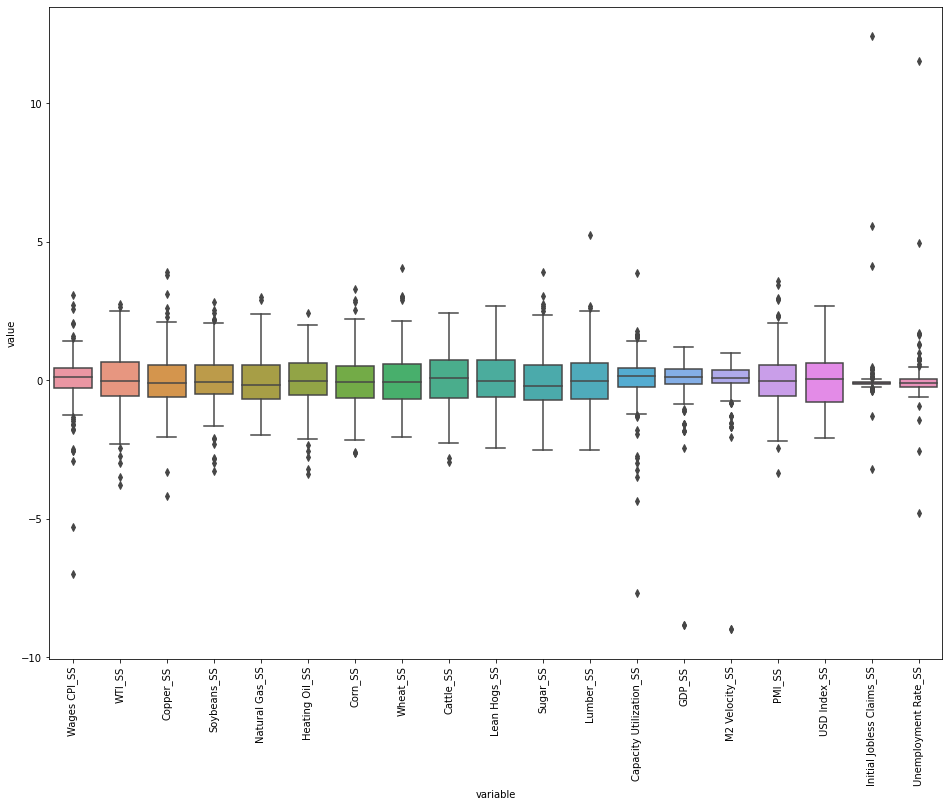

In [36]:
plt.figure(figsize=(16, 12))
chart = sns.boxplot(x='variable', y='value', data=pd.melt(df_X_train_SS))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

`X_test_SS` will not be scaled.

In [37]:
X_test_SS[['Wages CPI_SS', 'WTI_SS', 'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS', 'PMI_SS', 'USD Index_SS',
       'Initial Jobless Claims_SS', 'Unemployment Rate_SS']] = SS_scaler.transform(X_test_SS[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [38]:
X_test_SS.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_SS', 'WTI_SS',
       'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS',
       'Lumber_SS', 'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS',
       'PMI_SS', 'USD Index_SS', 'Initial Jobless Claims_SS',
       'Unemployment Rate_SS'],
      dtype='object')

In [39]:
X_test_SS.drop(columns=prev_cols, inplace=True)

In [40]:
X_test_SS.describe()

,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.039446,-0.046560,-0.151935,0.158702,-0.001416,-0.153214,0.271715,0.147639,-0.020189,0.150634,0.042247,0.105954,0.085988,0.114837,-0.011819,-0.177030,0.007469,-0.191525,-0.065229
std,1.003180,1.116542,0.986746,1.140603,0.975567,0.963172,1.089934,1.083590,1.040120,1.097781,0.918600,1.470259,1.232635,1.525901,1.104324,1.048915,1.020621,2.410044,1.295092
min,-6.008413,-3.755452,-4.281991,-3.578469,-2.087724,-3.479765,-2.917356,-2.913521,-3.321206,-2.026099,-1.857711,-2.360196,-7.342127,-8.837955,-8.988479,-4.147665,-2.129319,-12.599764,-5.342334
25%,-0.383316,-0.529745,-0.692793,-0.534923,-0.585450,-0.578672,-0.322636,-0.559743,-0.760703,-0.704479,-0.517446,-0.778532,-0.172902,-0.221962,-0.236393,-0.866544,-0.610996,-0.129723,-0.276383
50%,0.169963,0.082344,-0.298726,0.027747,-0.078682,-0.033070,0.158283,-0.041941,0.073698,0.035594,-0.128461,-0.174865,0.168818,0.068250,0.043185,-0.319213,-0.060458,-0.097518,-0.151811
75%,0.452194,0.515139,0.412443,0.796244,0.688486,0.506057,0.848489,0.678288,0.811777,0.896525,0.528436,0.723928,0.421522,0.282676,0.402552,0.342742,0.589525,-0.054792,0.014286
max,1.801829,3.879327,2.759676,2.987912,2.562655,1.748558,3.974551,4.040076,1.834564,2.674612,3.173226,6.689149,5.824493,6.258379,2.067133,3.130979,3.441559,17.266415,9.066558


Next `y_train_SS`

In [41]:
SS_scaler.fit(y_train_SS[['Inflation']])

StandardScaler()

In [42]:
y_train_SS['Inflation_SS'] = SS_scaler.transform(y_train_SS[['Inflation']])
y_train_SS.drop(columns='Inflation', inplace=True)

In [43]:
y_train_SS.describe()

,Inflation_SS
count,2.180000e+02
mean,1.222264e-17
std,1.002301e+00
min,-4.436994e+00
25%,-4.187935e-01
50%,-1.285149e-02
75%,4.430526e-01
max,5.095772e+00


Next `y_test_SS` but it will not be 'fitted'.

In [44]:
y_test_SS['Inflation_SS'] = SS_scaler.transform(y_test_SS[['Inflation']])
y_test_SS.drop(columns='Inflation', inplace=True)

In [45]:
y_test_SS.describe()

,Inflation_SS
count,94.000000
mean,0.173736
std,1.098587
min,-5.962087
25%,-0.369456
50%,0.190744
75%,0.720967
max,3.599407


Finally `y_tr_pred_SS`

Now to review the results.

In [46]:
reg_all_SS = LinearRegression(X_train_SS,y_train)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_SS    WTI_SS  Copper_SS  Soybeans_SS  Natural Gas_SS  \
101     -0.272503  0.770139  -0.036749    -0.345722       -1.319337   
193      0.081334 -0.036542   0.451293     0.090576        1.639295   
72      -0.668041 -0.496463  -0.027826    -2.795000       -0.849965   
298      0.427689  0.697303   0.255910     0.133888        1.354380   
15       0.073309 -0.130975  -0.288996     0.162870        0.314771   
..            ...       ...        ...          ...             ...   
188     -1.469548 -1.079604  -0.300948     0.831251       -0.220838   
71      -0.956924 -0.948540  -0.343656    -2.840279       -0.743877   
106      0.171832 -1.022849  -0.397019    -0.081824       -0.524624   
270      0.323446  0.420422  -0.398186     0.216809        0.137346   
102     -0.263450  0.806356  -0.696430    -1.099487       -1.042590   

     Heating Oil_SS   Corn_SS  Wheat_S

In [47]:
lm = LinearRegression().fit(X_train_SS, y_train)

In [48]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred_SS = lm.predict(X_train_SS)
y_te_pred_SS = lm.predict(X_test_SS)

In [49]:
# r^2 - train, test
median_r2_SS = r2_score(y_train_SS, y_tr_pred_SS), r2_score(y_test_SS, y_te_pred_SS)
median_r2_SS

(0.3966218663866161, 0.27963587900831854)

In [50]:
median_mae_SS = mean_absolute_error( y_train_SS, y_tr_pred_SS), mean_absolute_error( y_test_SS, y_te_pred_SS )
median_mae_SS

(0.5376148557240371, 0.684026744163606)

In [51]:
median_mse_SS = mean_squared_error( y_train_SS, y_tr_pred_SS ), mean_squared_error( y_test_SS, y_te_pred_SS )
median_mse_SS

(0.6033781336133839, 0.860154317681419)

The R^2 results are less than impressive ( i.e. less than a simple coin flip ) but we will proceed.

In this case, I have no missing values so no need to impute.

# 3.4.2 MinMaxScaler ( X & y scaled )

The scalings approach & it's estimated results we will use in this section are as follows:
   * **MinMaxScaler ( `_MM` )** ( often called Normalization )
      * This approach reassigns the values from 0 -> 1


In [52]:
MM_scaler = MinMaxScaler()

First `X_train_MM`

In [53]:
MM_scaler.fit(X_train_MM[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

MinMaxScaler()

In [54]:
X_train_MM[['Wages CPI_MM', 'WTI_MM', 'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM', 'PMI_MM', 'USD Index_MM',
       'Initial Jobless Claims_MM', 'Unemployment Rate_MM']] = MM_scaler.transform(X_train_MM[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [55]:
X_train_MM.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_MM', 'WTI_MM',
       'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM',
       'Lumber_MM', 'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM',
       'PMI_MM', 'USD Index_MM', 'Initial Jobless Claims_MM',
       'Unemployment Rate_MM'],
      dtype='object')

In [56]:
X_train_MM.drop(columns=prev_cols, inplace=True)

In [57]:
X_train_MM.describe()

,Wages CPI_MM,WTI_MM,Copper_MM,Soybeans_MM,Natural Gas_MM,Heating Oil_MM,Corn_MM,Wheat_MM,Cattle_MM,Lean Hogs_MM,Sugar_MM,Lumber_MM,Capacity Utilization_MM,GDP_MM,M2 Velocity_MM,PMI_MM,USD Index_MM,Initial Jobless Claims_MM,Unemployment Rate_MM
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.694134,0.579751,0.517310,0.538476,0.396675,0.581892,0.446314,0.335362,0.549834,0.479716,0.393421,0.325337,0.665259,0.880570,0.901399,0.481537,0.439842,0.204474,0.294290
std,0.099718,0.153589,0.123627,0.164539,0.201917,0.172532,0.169350,0.165197,0.185796,0.195939,0.156372,0.129265,0.086814,0.099864,0.100515,0.144772,0.210531,0.064232,0.061419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.667559,0.492937,0.444239,0.455334,0.261206,0.488547,0.340384,0.224550,0.430120,0.358486,0.284566,0.235953,0.645221,0.866478,0.891685,0.397351,0.272979,0.196285,0.279898
50%,0.705608,0.573683,0.505297,0.529197,0.364864,0.574937,0.436468,0.327345,0.563600,0.470908,0.360948,0.320580,0.678057,0.893029,0.910229,0.479305,0.447251,0.198844,0.287532
75%,0.736719,0.682071,0.583506,0.625757,0.509995,0.691239,0.534231,0.433499,0.685891,0.621831,0.478981,0.404472,0.703004,0.920504,0.939016,0.562086,0.571801,0.201417,0.297710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The `Maximum` & `Minimum` are **1 & 0 respectively; it appears to be realigning according to the MinMaxScaler appropriately**

In [58]:
df_X_train_MM = pd.DataFrame(data = X_train_MM, columns = ['Wages CPI_MM', 'WTI_MM', 'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM', 'PMI_MM', 'USD Index_MM',
       'Initial Jobless Claims_MM', 'Unemployment Rate_MM'])

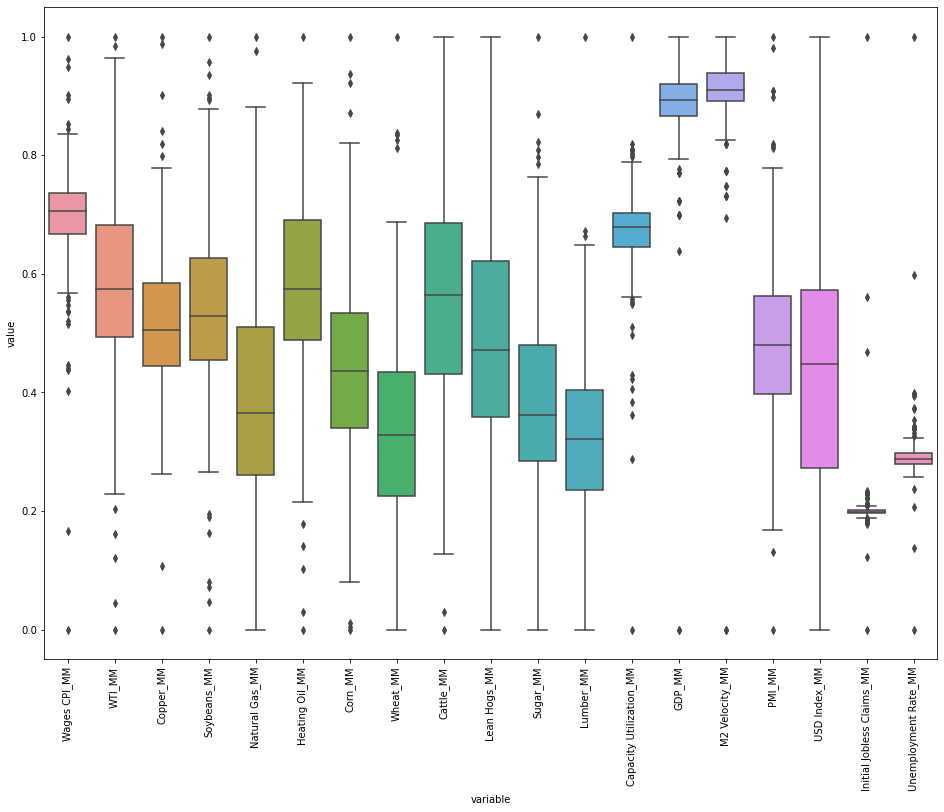

In [59]:
plt.figure(figsize=(16, 12))
chart = sns.boxplot(x='variable', y='value', data=pd.melt(df_X_train_MM))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

`X_test_MM` will not be 'fitted'.

In [60]:
X_test_MM[['Wages CPI_MM', 'WTI_MM', 'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM', 'PMI_MM', 'USD Index_MM',
       'Initial Jobless Claims_MM', 'Unemployment Rate_MM']] = MM_scaler.transform(X_test_MM[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [61]:
X_test_MM.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_MM', 'WTI_MM',
       'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM',
       'Lumber_MM', 'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM',
       'PMI_MM', 'USD Index_MM', 'Initial Jobless Claims_MM',
       'Unemployment Rate_MM'],
      dtype='object')

In [62]:
X_test_MM.drop(columns=prev_cols, inplace=True)

In [63]:
X_test_MM.describe()

,Wages CPI_MM,WTI_MM,Copper_MM,Soybeans_MM,Natural Gas_MM,Heating Oil_MM,Corn_MM,Wheat_MM,Cattle_MM,Lean Hogs_MM,Sugar_MM,Lumber_MM,Capacity Utilization_MM,GDP_MM,M2 Velocity_MM,PMI_MM,USD Index_MM,Initial Jobless Claims_MM,Unemployment Rate_MM
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.690210,0.572617,0.498569,0.564529,0.396389,0.555518,0.492223,0.359695,0.546091,0.509164,0.400012,0.339002,0.672707,0.892012,0.900214,0.455967,0.441410,0.192201,0.290293
std,0.099805,0.171094,0.121708,0.187243,0.196531,0.165797,0.184156,0.178595,0.192807,0.214604,0.143314,0.189617,0.106764,0.152033,0.110746,0.151505,0.214379,0.154446,0.079361
min,0.096365,0.004281,-0.010843,-0.048971,-0.023903,-0.017102,-0.046606,-0.144838,-0.065818,0.083637,0.103593,0.020946,0.029324,0.000000,0.000000,-0.117550,-0.007416,-0.602972,-0.033079
25%,0.655999,0.498575,0.431858,0.450662,0.278734,0.482281,0.391801,0.243106,0.408822,0.341999,0.312692,0.224931,0.650283,0.858455,0.877693,0.356374,0.311504,0.196161,0.277354
50%,0.711044,0.592369,0.480464,0.543031,0.380824,0.576199,0.473057,0.328449,0.563495,0.486675,0.373379,0.302785,0.679881,0.887370,0.905730,0.435430,0.427143,0.198225,0.284987
75%,0.739123,0.658689,0.568181,0.669189,0.535372,0.669003,0.589675,0.447156,0.700313,0.654977,0.475864,0.418701,0.701769,0.908735,0.941769,0.531043,0.563670,0.200963,0.295165
max,0.873396,1.174203,0.857696,1.028976,0.912929,0.882882,1.117858,1.001238,0.889907,1.002573,0.888486,1.188028,1.169745,1.504124,1.108699,0.933775,1.162732,1.310980,0.849873


Next `y_train_MM`

In [64]:
MM_scaler.fit(y_train_MM[['Inflation']])

MinMaxScaler()

In [65]:
y_train_MM['Inflation_MM'] = MM_scaler.transform(y_train_MM[['Inflation']])
y_train_MM.drop(columns='Inflation', inplace=True)

In [66]:
y_train_MM.describe()

,Inflation_MM
count,218.000000
mean,0.465447
std,0.105143
min,0.000000
25%,0.421515
50%,0.464099
75%,0.511923
max,1.000000


`y_test_MM` will not be 'fitted'.

In [67]:
y_test_MM['Inflation_MM'] = MM_scaler.transform(y_test_MM[['Inflation']])
y_test_MM.drop(columns='Inflation', inplace=True)

In [68]:
y_test_MM.describe()

,Inflation_MM
count,94.000000
mean,0.483672
std,0.115243
min,-0.159984
25%,0.426690
50%,0.485456
75%,0.541077
max,0.843029


In [69]:
reg_all_MM = LinearRegression(X_train_MM,y_train)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_MM    WTI_MM  Copper_MM  Soybeans_MM  Natural Gas_MM  \
101      0.667023  0.697764   0.512777     0.481722        0.130890   
193      0.702226  0.574152   0.572973     0.553345        0.726915   
72       0.627672  0.503675   0.513877     0.079645        0.225447   
298      0.736685  0.686603   0.548874     0.560455        0.669518   
15       0.701428  0.559681   0.481664     0.565213        0.460086   
..            ...       ...        ...          ...             ...   
188      0.547931  0.414317   0.480190     0.674936        0.352186   
71       0.598931  0.434401   0.474922     0.072212        0.246818   
106      0.711230  0.423014   0.468340     0.525044        0.290988   
270      0.726314  0.644175   0.468196     0.574068        0.424343   
102      0.667924  0.703314   0.431410     0.357983        0.186642   

     Heating Oil_MM   Corn_MM  Wheat_M

In [70]:
lm_MM = LinearRegression().fit(X_train_MM, y_train)

In [71]:
y_tr_pred_MM = lm.predict(X_train_MM)
y_te_pred_MM = lm.predict(X_test_MM)

In [72]:
median_r2_MM = r2_score(y_train_MM, y_tr_pred_MM), r2_score(y_test_MM, y_te_pred_MM)
median_r2_MM

(0.04244332823366492, -0.1084585018992883)

In [73]:
median_mae_MM = mean_absolute_error( y_train_MM, y_tr_pred_MM), mean_absolute_error( y_test_MM, y_te_pred_MM )
median_mae_MM

(0.08105680725634007, 0.0943169295864142)

In [74]:
median_mse_MM = mean_squared_error( y_train_MM, y_tr_pred_MM ), mean_squared_error( y_test_MM, y_te_pred_MM )
median_mse_MM

(0.010537232957961407, 0.014564843873227162)

This scaling approach conveys that it is not appropriate for this data set.

# 3.4.3 Log Transform ( X & y scaled )

The scalings approach & it's estimated results we will use in this section are as follows:
   * **Log Transformation ( `_Log` )**
      * This approach usually is used with data that has long tails

In [75]:
LG_scaler = PowerTransformer()

First `X_train_LG`

In [76]:
LG_scaler.fit(X_train_LG[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'PMI',
       'Initial Jobless Claims', 'Unemployment Rate']])

PowerTransformer()

In [77]:
X_train_LG[['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']] = LG_scaler.transform(X_train_LG[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

Unlike the previous scaling approaches, we will first investigate visually if they were scaled.

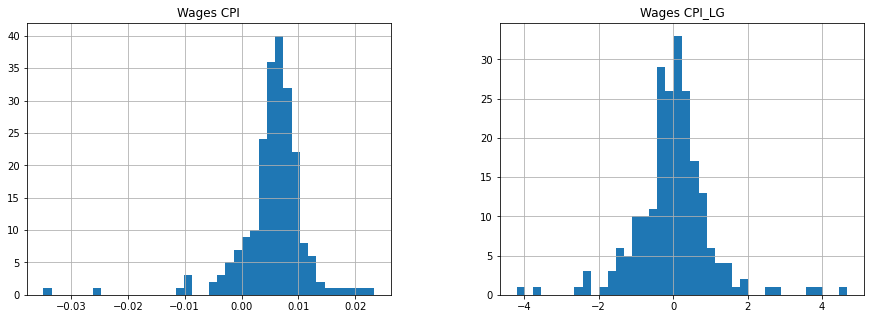

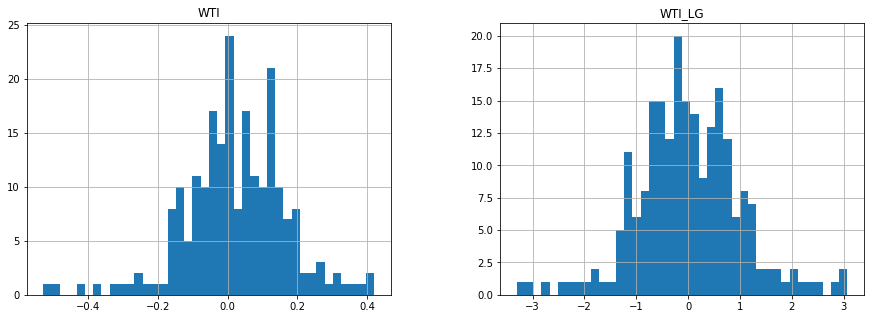

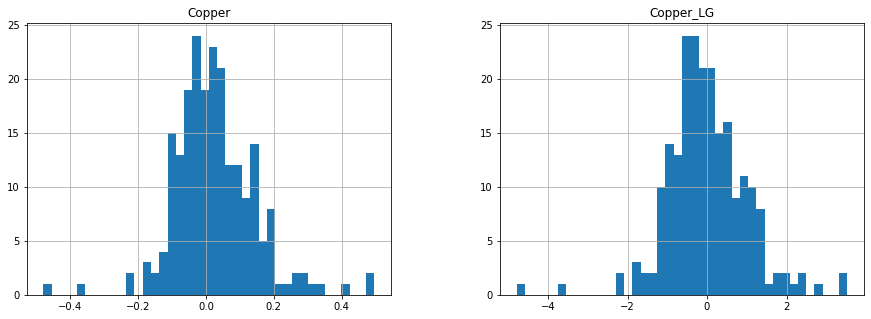

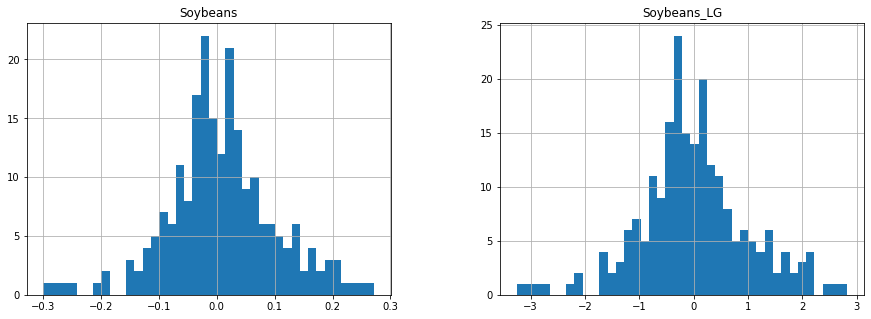

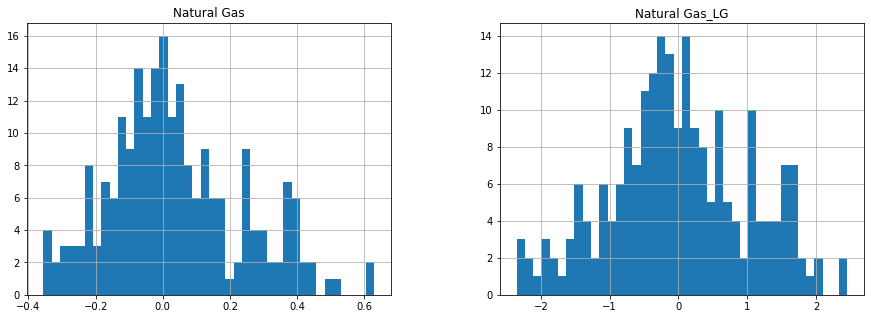

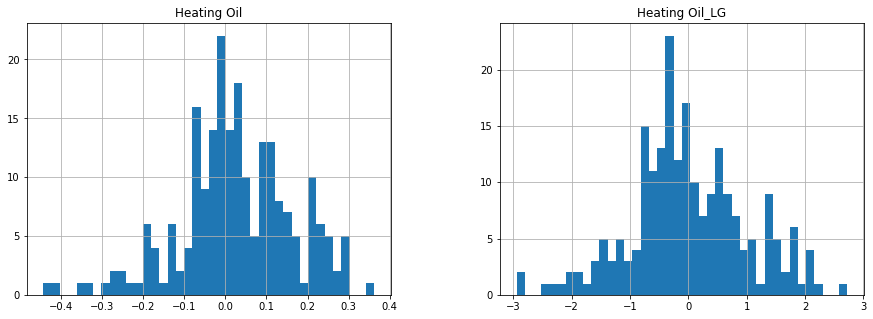

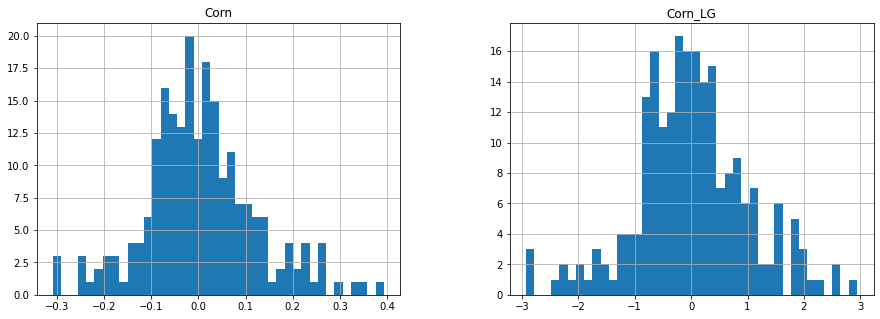

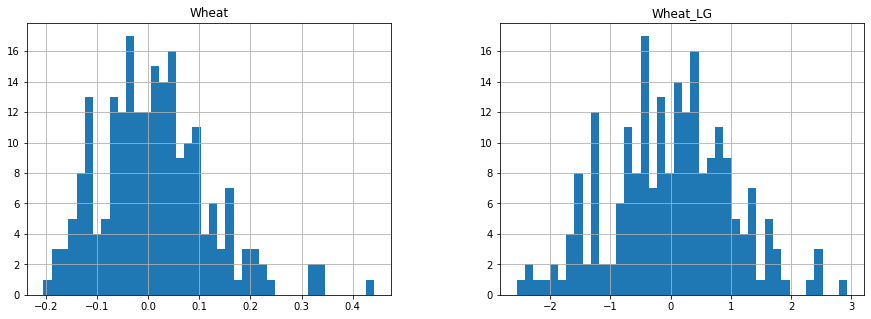

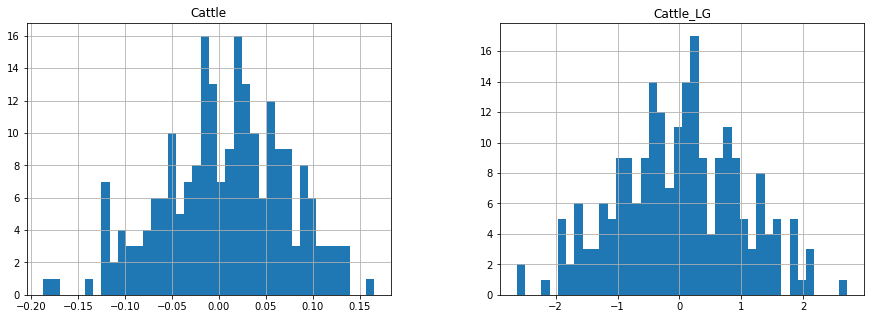

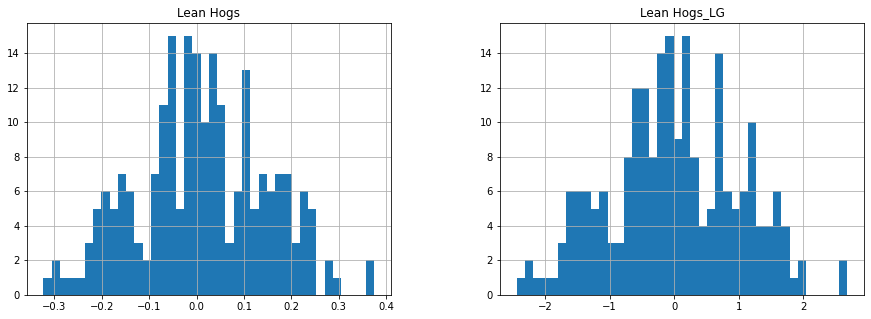

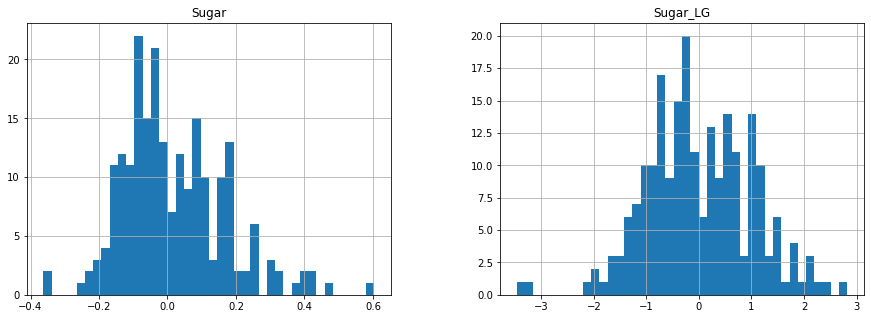

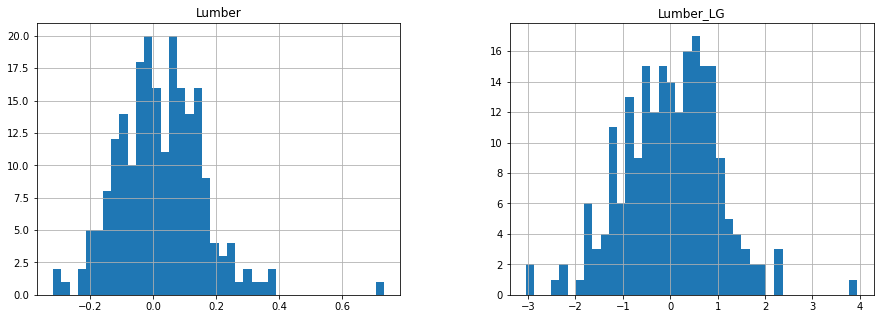

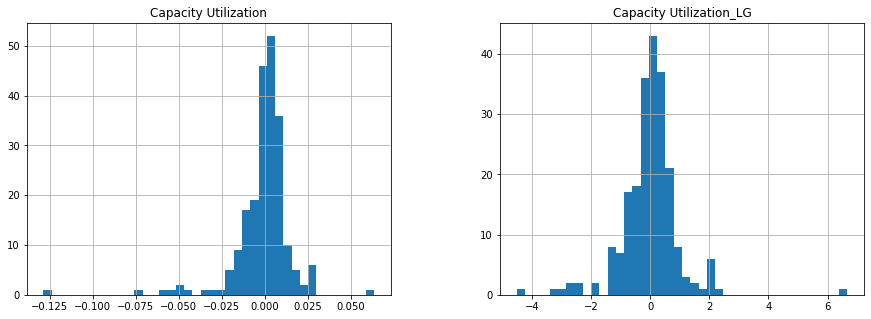

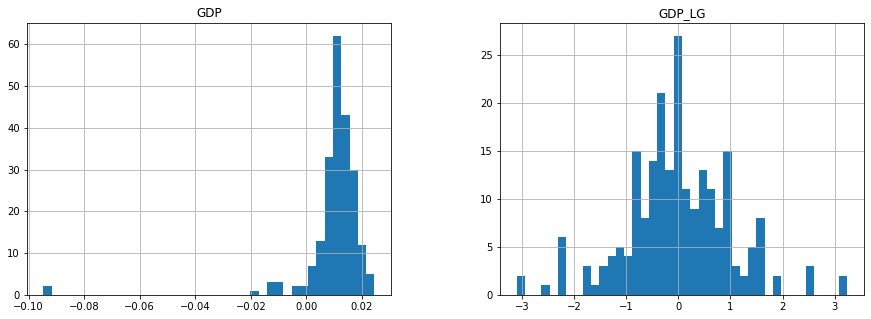

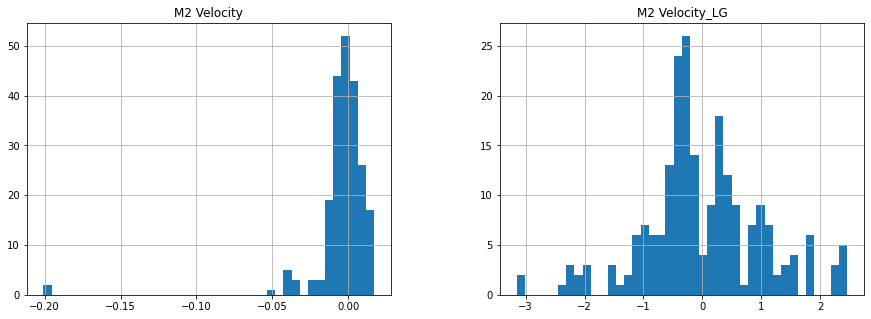

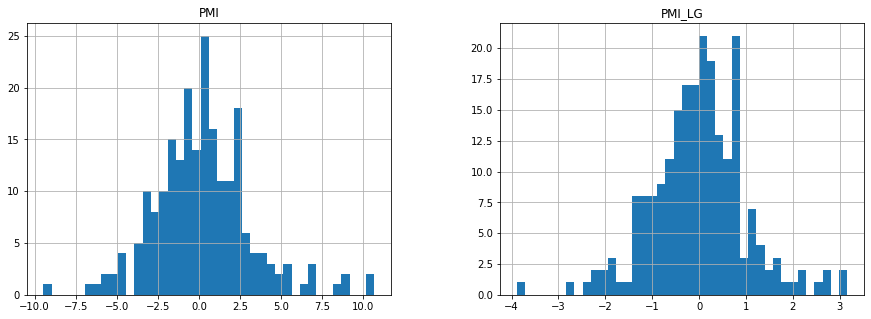

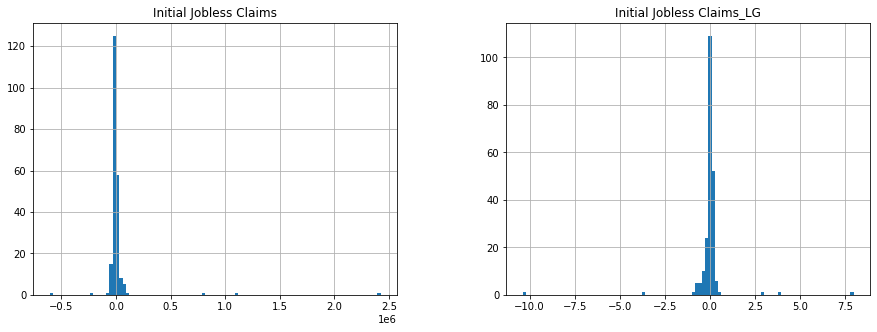

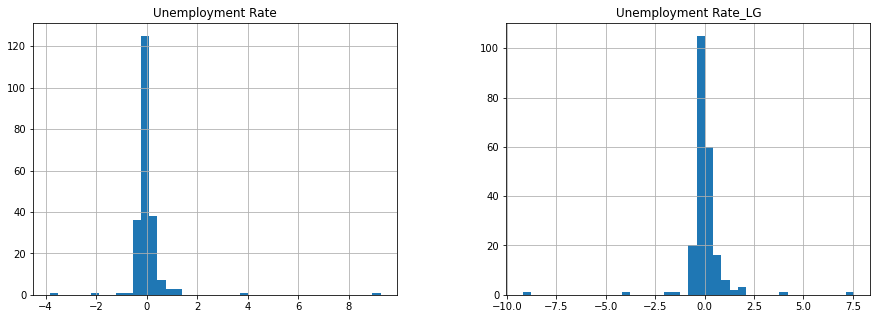

In [78]:
# to visually confirm one of the variables
X_train_LG[['Wages CPI','Wages CPI_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['WTI','WTI_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Copper','Copper_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Soybeans','Soybeans_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Natural Gas','Natural Gas_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Heating Oil','Heating Oil_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Corn','Corn_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Wheat','Wheat_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Cattle','Cattle_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Lean Hogs','Lean Hogs_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Sugar','Sugar_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Lumber','Lumber_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Capacity Utilization','Capacity Utilization_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['GDP','GDP_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['M2 Velocity','M2 Velocity_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['PMI','PMI_LG']].hist(figsize=(15,5),bins=40)
X_train_LG[['Initial Jobless Claims','Initial Jobless Claims_LG']].hist(figsize=(15,5),bins=100)
X_train_LG[['Unemployment Rate','Unemployment Rate_LG']].hist(figsize=(15,5),bins=40)
plt.show()

We will also look at a box plot.

In [79]:
df_X_train_LG = pd.DataFrame(data = X_train_LG, columns = ['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG'])

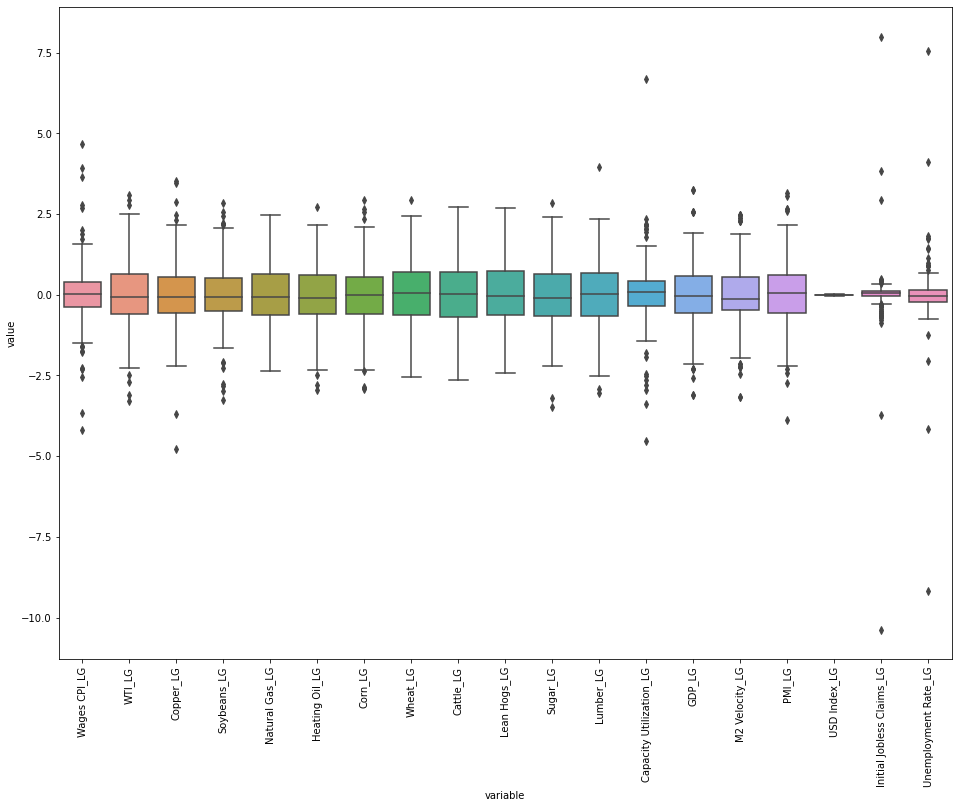

In [80]:
plt.figure(figsize=(16, 12))
chart = sns.boxplot(x='variable', y='value', data=pd.melt(df_X_train_LG))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

While they all seem to work, the following appear to either have an outlier issue or `Log Transform` works very well:
   * `Wages CPI` ( prob outliers -- take a look at boxplot )
   * `Capacity Utilization` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )
   * `GDP`
   * `M2 Velocity`
   * `Initial Jobless Claims` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )
   * `Unemployment Rate` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )

We will continue with all.

In [81]:
X_train_LG.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_LG', 'WTI_LG',
       'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG',
       'Lumber_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'PMI_LG', 'USD Index_LG', 'Initial Jobless Claims_LG',
       'Unemployment Rate_LG'],
      dtype='object')

In [82]:
X_train_LG.drop(columns=prev_cols, inplace=True)

In [83]:
X_train_LG.describe()

,Wages CPI_LG,WTI_LG,Copper_LG,Soybeans_LG,Natural Gas_LG,Heating Oil_LG,Corn_LG,Wheat_LG,Cattle_LG,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,2.180000e+02,2.180000e+02
mean,-2.340126e-16,-1.018553e-17,2.953804e-17,2.648238e-17,3.463081e-17,2.711898e-17,3.921430e-17,-3.514009e-17,4.736273e-17,-3.182979e-17,-1.120409e-17,1.121204e-17,-1.527830e-17,-2.663517e-16,7.766468e-18,4.933617e-18,-0.012799,2.419064e-17,2.495455e-17
std,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,0.012007,1.002301e+00,1.002301e+00
min,-4.203779e+00,-3.308051e+00,-4.790893e+00,-3.256541e+00,-2.351455e+00,-2.941212e+00,-2.924180e+00,-2.556952e+00,-2.633208e+00,-2.438256e+00,-3.468529e+00,-3.038505e+00,-4.520455e+00,-3.102066e+00,-3.155028e+00,-3.893245e+00,-0.037961,-1.037009e+01,-9.181910e+00
25%,-3.922100e-01,-6.014282e-01,-5.750684e-01,-5.083560e-01,-6.365610e-01,-5.845875e-01,-6.062502e-01,-6.420350e-01,-6.802635e-01,-6.221477e-01,-6.725542e-01,-6.727191e-01,-3.616021e-01,-5.612664e-01,-4.877854e-01,-5.535478e-01,-0.022312,-5.411911e-02,-2.153957e-01
50%,2.665979e-02,-8.488108e-02,-6.524111e-02,-5.906084e-02,-6.468975e-02,-9.381907e-02,-1.671215e-02,6.137467e-02,2.357134e-02,-4.833773e-02,-1.004732e-01,3.617663e-02,6.764572e-02,-5.308771e-02,-1.275063e-01,5.063059e-02,-0.012357,5.152233e-02,-5.318401e-02
75%,3.947888e-01,6.501558e-01,5.626163e-01,5.299037e-01,6.392270e-01,6.113677e-01,5.536605e-01,6.883328e-01,7.166612e-01,7.255195e-01,6.539755e-01,6.712153e-01,4.176488e-01,5.796108e-01,5.338289e-01,5.976906e-01,-0.005258,1.047383e-01,1.530685e-01
max,4.675375e+00,3.071756e+00,3.530729e+00,2.828528e+00,2.453249e+00,2.727610e+00,2.942093e+00,2.934426e+00,2.718479e+00,2.680506e+00,2.825044e+00,3.940244e+00,6.673082e+00,3.243365e+00,2.464245e+00,3.163166e+00,0.019044,7.995727e+00,7.548036e+00


All have a **Standard Deviation** `std` of 1 & A **Mean** `mean` of 0 so we will continue to the next.

`X_test_LG` will not be fitted.

In [84]:
X_test_LG[['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']] = LG_scaler.transform(X_test_LG[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [85]:
X_test_LG.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_LG', 'WTI_LG',
       'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG',
       'Lumber_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'PMI_LG', 'USD Index_LG', 'Initial Jobless Claims_LG',
       'Unemployment Rate_LG'],
      dtype='object')

In [86]:
X_test_LG.drop(columns=prev_cols, inplace=True)

In [87]:
X_test_LG.describe()

,Wages CPI_LG,WTI_LG,Copper_LG,Soybeans_LG,Natural Gas_LG,Heating Oil_LG,Corn_LG,Wheat_LG,Cattle_LG,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.047693,-0.037448,-0.153213,0.159483,0.002810,-0.159143,0.264644,0.138916,-0.017094,0.151326,0.065967,0.042307,0.176193,5.586587,0.120131,-0.186320,-0.012710,-0.909727,-0.150826
std,0.936789,1.128672,1.012834,1.141851,0.997253,0.929729,1.064146,1.049302,1.028891,1.100073,0.895027,1.322624,1.686065,31.889558,1.803137,1.077949,0.012223,5.822624,1.526160
min,-3.920954,-3.287139,-4.904334,-3.550108,-2.528186,-3.013564,-3.268768,-4.099501,-2.896506,-2.016261,-2.322866,-2.804925,-4.434456,-3.102066,-3.155028,-4.946035,-0.038387,-45.855891,-10.531449
25%,-0.512638,-0.566183,-0.680598,-0.536740,-0.535525,-0.619124,-0.287157,-0.507488,-0.787777,-0.706116,-0.453744,-0.770490,-0.297658,-0.696151,-0.730212,-0.873789,-0.020109,-0.059427,-0.270843
50%,0.089276,0.038451,-0.270453,0.025206,0.017914,-0.086442,0.200127,0.068382,0.022997,0.032323,-0.013983,-0.106885,0.092531,-0.168892,-0.219277,-0.265238,-0.013504,0.026916,-0.106555
75%,0.424234,0.487573,0.441645,0.795398,0.752372,0.472593,0.864834,0.762557,0.801550,0.895996,0.635791,0.772985,0.399815,0.294391,0.604431,0.397687,-0.005721,0.098485,0.102587
max,2.326684,4.558602,2.577670,3.007478,2.178059,1.883646,3.477895,2.937958,1.979732,2.693881,2.469022,4.689258,12.738059,180.209518,8.746628,2.793352,0.028239,10.843220,6.385635


Next `y_train_LG`

In [88]:
LG_scaler.fit(y_train_LG[['Inflation']])

PowerTransformer()

In [89]:
y_train_LG['Inflation_LG'] = LG_scaler.transform(y_train_LG[['Inflation']])
y_train_LG.drop(columns='Inflation', inplace=True)

In [90]:
y_train_LG.describe()

,Inflation_LG
count,2.180000e+02
mean,-1.476902e-17
std,1.002301e+00
min,-4.657212e+00
25%,-4.084960e-01
50%,1.670749e-03
75%,4.547053e-01
max,4.837648e+00


`y_test_LG` will not be 'fitted'.

In [91]:
y_test_LG['Inflation_LG'] = LG_scaler.transform(y_test_LG[['Inflation']])
y_test_LG.drop(columns='Inflation', inplace=True)

In [92]:
y_test_LG.describe()

,Inflation_LG
count,94.000000
mean,0.171549
std,1.113639
min,-6.322960
25%,-0.358347
50%,0.204995
75%,0.727292
max,3.458603


Finally `y_tr_pred_LG`

In [93]:
reg_new_LG = LinearRegression()

In [94]:
reg_new_LG = LogisticRegression(X_train_LG,y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass dual=     Inflation_LG
101     -0.554933
193      0.808334
72      -0.416118
298      0.076718
15       0.478078
..            ...
188     -1.049346
71      -0.307001
106      0.487913
270      0.505117
102     -0.653323

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [95]:
lm_LG = LinearRegression().fit(X_train_LG, y_train_LG)

In [96]:
y_tr_pred_LG = lm_LG.predict(X_train_LG)
y_te_pred_LG = lm_LG.predict(X_test_LG)

In [97]:
median_r2_LG = r2_score(y_train_LG, y_tr_pred_LG), r2_score(y_test_LG, y_te_pred_LG)
median_r2_LG

(0.4148569866278432, -23.831871225431428)

In [98]:
median_mae_LG = mean_absolute_error( y_train_LG, y_tr_pred_LG), mean_absolute_error( y_test_LG, y_te_pred_LG )
median_mae_LG

(0.5477840016169129, 1.6306174827253697)

In [99]:
median_mse_LG = mean_squared_error( y_train_LG, y_tr_pred_LG ), mean_squared_error( y_test_LG, y_te_pred_LG )
median_mse_LG

(0.5851430133721568, 30.468676447186148)

**Standardization ( X only )** | *Assignment to its respective data frames.*

In [100]:
X_train_SS_y_uns = pd.DataFrame(X_train.copy())
X_test_SS_y_uns = pd.DataFrame(X_test.copy())
y_train_SS_y_uns = pd.DataFrame(y_train.copy())
y_test_SS_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_SS_y_uns = pd.DataFrame(y_pred.copy())

**MinMaxScaler ( X only )** | *Assignment to its respective data frames.*

In [101]:
X_train_MM_y_uns = pd.DataFrame(X_train.copy())
X_test_MM_y_uns = pd.DataFrame(X_test.copy())
y_train_MM_y_uns = pd.DataFrame(y_train.copy())
y_test_MM_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_MM_y_uns = pd.DataFrame(y_pred.copy())

**Log Transformation ( X only )** | *Assignment to its respective data frames.*

In [102]:
X_train_LG_y_uns = pd.DataFrame(X_train.copy())
X_test_LG_y_uns = pd.DataFrame(X_test.copy())
y_train_LG_y_uns = pd.DataFrame(y_train.copy())
y_test_LG_y_uns = pd.DataFrame(y_test.copy())
y_tr_pred_LG_y_uns = pd.DataFrame(y_pred.copy())

# 3.4.4 Standardization ( X scaled only )

As a reminder, **we are running through the same process albeit not scaling `y`.**

In [103]:
SS_scaler = StandardScaler()

First `X_train_SS_y_uns`

In [104]:
SS_scaler.fit(X_train_SS_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

StandardScaler()

In [105]:
X_train_SS_y_uns[['Wages CPI_SS_yun', 'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun', 'Heating Oil_SS_yun',
       'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun',
       'Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun', 'PMI_SS_yun', 'USD Index_SS_yun',
       'Initial Jobless Claims_SS_yun', 'Unemployment Rate_SS_yun']] = SS_scaler.transform(X_train_SS_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [106]:
X_train_SS_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_SS_yun',
       'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun',
       'Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun', 'Initial Jobless Claims_SS_yun',
       'Unemployment Rate_SS_yun'],
      dtype='object')

In [107]:
X_train_SS_y_uns.drop(columns=prev_cols, inplace=True)

In [108]:
X_train_SS_y_uns.describe()

,Wages CPI_SS_yun,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,GDP_SS_yun,M2 Velocity_SS_yun,PMI_SS_yun,USD Index_SS_yun,Initial Jobless Claims_SS_yun,Unemployment Rate_SS_yun
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,2.180000e+02,2.180000e+02
mean,-4.838128e-18,2.750094e-17,1.680613e-17,-2.750094e-17,1.018553e-18,2.113498e-17,5.754826e-17,-3.004732e-17,-2.801021e-18,-7.639149e-18,-4.838128e-17,-2.049838e-17,-2.088034e-17,5.627507e-17,2.215353e-17,4.869958e-18,0.000000,-6.875234e-18,1.222264e-17
std,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301,1.002301e+00,1.002301e+00
min,-6.977019e+00,-3.783391e+00,-4.194080e+00,-3.280162e+00,-1.969069e+00,-3.380414e+00,-2.641519e+00,-2.034743e+00,-2.966145e+00,-2.453932e+00,-2.521716e+00,-2.522608e+00,-7.680682e+00,-8.837955e+00,-8.988479e+00,-3.333833e+00,-2.094012,-3.190713e+00,-4.802520e+00
25%,-2.671202e-01,-5.665365e-01,-5.924217e-01,-5.064631e-01,-6.724566e-01,-5.422759e-01,-6.269477e-01,-6.723267e-01,-6.458132e-01,-6.201385e-01,-6.977306e-01,-6.930695e-01,-2.313524e-01,-1.414367e-01,-9.686651e-02,-5.828489e-01,-0.794405,-1.277904e-01,-2.348593e-01
50%,1.153214e-01,-3.959852e-02,-9.739427e-02,-5.652283e-02,-1.579051e-01,-4.040096e-02,-5.827166e-02,-4.863862e-02,7.426409e-02,-4.506087e-02,-2.081390e-01,-3.689083e-02,1.477523e-01,1.250461e-01,8.804844e-02,-1.545851e-02,0.035274,-8.785599e-02,-1.102867e-01
75%,4.280369e-01,6.677299e-01,5.366898e-01,5.316750e-01,5.625160e-01,6.352366e-01,5.203411e-01,5.954279e-01,7.339765e-01,7.269682e-01,5.484182e-01,6.135977e-01,4.357818e-01,4.008007e-01,3.751039e-01,5.576631e-01,0.628237,-4.770693e-02,5.581003e-02
max,3.074376e+00,2.742497e+00,3.913407e+00,2.811401e+00,2.994870e+00,2.428936e+00,3.277006e+00,4.032564e+00,2.428476e+00,2.661448e+00,3.888003e+00,5.231216e+00,3.864717e+00,1.198672e+00,9.832153e-01,3.589476e+00,2.666820,1.241375e+01,1.151649e+01


The **Mean** & **Standard Deviation** look close enough to 0 & 1 respectively; thus, it was scaled correctly. We will now scale the others.

`X_test_SS_y_uns` will not be 'fitted'.

In [109]:
X_test_SS_y_uns[['Wages CPI_SS_yun', 'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun', 'Heating Oil_SS_yun',
       'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun',
       'Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun', 'PMI_SS_yun', 'USD Index_SS_yun',
       'Initial Jobless Claims_SS_yun', 'Unemployment Rate_SS_yun']] = SS_scaler.transform(X_test_SS_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [110]:
X_test_SS_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_SS_yun',
       'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun',
       'Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun', 'Initial Jobless Claims_SS_yun',
       'Unemployment Rate_SS_yun'],
      dtype='object')

In [111]:
X_test_SS_y_uns.drop(columns=prev_cols, inplace=True)

In [112]:
X_test_SS_y_uns.describe()

,Wages CPI_SS_yun,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,GDP_SS_yun,M2 Velocity_SS_yun,PMI_SS_yun,USD Index_SS_yun,Initial Jobless Claims_SS_yun,Unemployment Rate_SS_yun
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.039446,-0.046560,-0.151935,0.158702,-0.001416,-0.153214,0.271715,0.147639,-0.020189,0.150634,0.042247,0.105954,0.085988,0.114837,-0.011819,-0.177030,0.007469,-0.191525,-0.065229
std,1.003180,1.116542,0.986746,1.140603,0.975567,0.963172,1.089934,1.083590,1.040120,1.097781,0.918600,1.470259,1.232635,1.525901,1.104324,1.048915,1.020621,2.410044,1.295092
min,-6.008413,-3.755452,-4.281991,-3.578469,-2.087724,-3.479765,-2.917356,-2.913521,-3.321206,-2.026099,-1.857711,-2.360196,-7.342127,-8.837955,-8.988479,-4.147665,-2.129319,-12.599764,-5.342334
25%,-0.383316,-0.529745,-0.692793,-0.534923,-0.585450,-0.578672,-0.322636,-0.559743,-0.760703,-0.704479,-0.517446,-0.778532,-0.172902,-0.221962,-0.236393,-0.866544,-0.610996,-0.129723,-0.276383
50%,0.169963,0.082344,-0.298726,0.027747,-0.078682,-0.033070,0.158283,-0.041941,0.073698,0.035594,-0.128461,-0.174865,0.168818,0.068250,0.043185,-0.319213,-0.060458,-0.097518,-0.151811
75%,0.452194,0.515139,0.412443,0.796244,0.688486,0.506057,0.848489,0.678288,0.811777,0.896525,0.528436,0.723928,0.421522,0.282676,0.402552,0.342742,0.589525,-0.054792,0.014286
max,1.801829,3.879327,2.759676,2.987912,2.562655,1.748558,3.974551,4.040076,1.834564,2.674612,3.173226,6.689149,5.824493,6.258379,2.067133,3.130979,3.441559,17.266415,9.066558


Although the `mean` & `std` look close to 0 & 1, they are different to those in the scaled `Training` set which was scaled.

As a reminder, `y_train_SS_y_uns` & `y_test_SS_y_uns` will not be scaled or fit in this section.

Now to review the results.

In [113]:
reg_all_SS = LinearRegression(X_train_SS_y_uns,y_train_SS_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_SS_yun  WTI_SS_yun  Copper_SS_yun  Soybeans_SS_yun  \
101         -0.272503    0.770139      -0.036749        -0.345722   
193          0.081334   -0.036542       0.451293         0.090576   
72          -0.668041   -0.496463      -0.027826        -2.795000   
298          0.427689    0.697303       0.255910         0.133888   
15           0.073309   -0.130975      -0.288996         0.162870   
..                ...         ...            ...              ...   
188         -1.469548   -1.079604      -0.300948         0.831251   
71          -0.956924   -0.948540      -0.343656        -2.840279   
106          0.171832   -1.022849      -0.397019        -0.081824   
270          0.323446    0.420422      -0.398186         0.216809   
102         -0.263450    0.806356      -0.696430        -1.099487   

     Natural Gas_SS_yun  Heating Oil_SS_yun  Corn_SS_yun  Whea

In [114]:
lm = LinearRegression().fit(X_train_SS_y_uns, y_train_SS_y_uns)

In [115]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred_SS_y_uns = lm.predict(X_train_SS_y_uns)
y_te_pred_SS_y_uns = lm.predict(X_test_SS_y_uns)

In [116]:
# r^2 - train, test
median_r2_SS_y_uns = r2_score(y_train_SS_y_uns, y_tr_pred_SS_y_uns), r2_score(y_test_SS_y_uns, y_te_pred_SS_y_uns)
median_r2_SS_y_uns

(0.41854924961510787, 0.25400580457075284)

In [117]:
median_mae_SS_y_uns = mean_absolute_error( y_train_SS_y_uns, y_tr_pred_SS_y_uns), mean_absolute_error( y_test_SS_y_uns, y_te_pred_SS_y_uns )
median_mae_SS_y_uns

(0.4311624920931224, 0.5629835146122822)

In [118]:
median_mse_SS_y_uns = mean_squared_error( y_train_SS_y_uns, y_tr_pred_SS_y_uns ), mean_squared_error( y_test_SS_y_uns, y_te_pred_SS_y_uns )
median_mse_SS_y_uns

(0.37269344445032876, 0.5709506430867561)

The R^2 results are less than impressive ( i.e. less than a simple coin flip ) but we will proceed.

In this case, I have no missing values so no need to impute.

# 3.4.5 MinMaxScaler ( X scaled only )

In [119]:
MM_scaler = MinMaxScaler()

First `X_train_MM_y_uns`

In [120]:
MM_scaler.fit(X_train_MM_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

MinMaxScaler()

In [121]:
X_train_MM_y_uns[['Wages CPI_MM', 'WTI_MM', 'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM', 'PMI_MM', 'USD Index_MM',
       'Initial Jobless Claims_MM', 'Unemployment Rate_MM']] = MM_scaler.transform(X_train_MM_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [122]:
X_train_MM_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_MM', 'WTI_MM',
       'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM',
       'Lumber_MM', 'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM',
       'PMI_MM', 'USD Index_MM', 'Initial Jobless Claims_MM',
       'Unemployment Rate_MM'],
      dtype='object')

In [123]:
X_train_MM_y_uns.drop(columns=prev_cols, inplace=True)

In [124]:
X_train_MM_y_uns.describe()

,Wages CPI_MM,WTI_MM,Copper_MM,Soybeans_MM,Natural Gas_MM,Heating Oil_MM,Corn_MM,Wheat_MM,Cattle_MM,Lean Hogs_MM,Sugar_MM,Lumber_MM,Capacity Utilization_MM,GDP_MM,M2 Velocity_MM,PMI_MM,USD Index_MM,Initial Jobless Claims_MM,Unemployment Rate_MM
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.694134,0.579751,0.517310,0.538476,0.396675,0.581892,0.446314,0.335362,0.549834,0.479716,0.393421,0.325337,0.665259,0.880570,0.901399,0.481537,0.439842,0.204474,0.294290
std,0.099718,0.153589,0.123627,0.164539,0.201917,0.172532,0.169350,0.165197,0.185796,0.195939,0.156372,0.129265,0.086814,0.099864,0.100515,0.144772,0.210531,0.064232,0.061419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.667559,0.492937,0.444239,0.455334,0.261206,0.488547,0.340384,0.224550,0.430120,0.358486,0.284566,0.235953,0.645221,0.866478,0.891685,0.397351,0.272979,0.196285,0.279898
50%,0.705608,0.573683,0.505297,0.529197,0.364864,0.574937,0.436468,0.327345,0.563600,0.470908,0.360948,0.320580,0.678057,0.893029,0.910229,0.479305,0.447251,0.198844,0.287532
75%,0.736719,0.682071,0.583506,0.625757,0.509995,0.691239,0.534231,0.433499,0.685891,0.621831,0.478981,0.404472,0.703004,0.920504,0.939016,0.562086,0.571801,0.201417,0.297710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The `Maximum` & `Minimum` are **1 & 0 respectively; it appears to be realigning according to the MinMaxScaler appropriately**

`X_test_MM_y_uns` will not be 'fitted'.

In [125]:
X_test_MM_y_uns[['Wages CPI_MM', 'WTI_MM', 'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM', 'Lumber_MM',
       'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM', 'PMI_MM', 'USD Index_MM',
       'Initial Jobless Claims_MM', 'Unemployment Rate_MM']] = MM_scaler.transform(X_test_MM_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [126]:
X_test_MM_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_MM', 'WTI_MM',
       'Copper_MM', 'Soybeans_MM', 'Natural Gas_MM', 'Heating Oil_MM',
       'Corn_MM', 'Wheat_MM', 'Cattle_MM', 'Lean Hogs_MM', 'Sugar_MM',
       'Lumber_MM', 'Capacity Utilization_MM', 'GDP_MM', 'M2 Velocity_MM',
       'PMI_MM', 'USD Index_MM', 'Initial Jobless Claims_MM',
       'Unemployment Rate_MM'],
      dtype='object')

In [127]:
X_test_MM_y_uns.drop(columns=prev_cols, inplace=True)

In [128]:
X_test_MM.describe()

,Wages CPI_MM,WTI_MM,Copper_MM,Soybeans_MM,Natural Gas_MM,Heating Oil_MM,Corn_MM,Wheat_MM,Cattle_MM,Lean Hogs_MM,Sugar_MM,Lumber_MM,Capacity Utilization_MM,GDP_MM,M2 Velocity_MM,PMI_MM,USD Index_MM,Initial Jobless Claims_MM,Unemployment Rate_MM
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.690210,0.572617,0.498569,0.564529,0.396389,0.555518,0.492223,0.359695,0.546091,0.509164,0.400012,0.339002,0.672707,0.892012,0.900214,0.455967,0.441410,0.192201,0.290293
std,0.099805,0.171094,0.121708,0.187243,0.196531,0.165797,0.184156,0.178595,0.192807,0.214604,0.143314,0.189617,0.106764,0.152033,0.110746,0.151505,0.214379,0.154446,0.079361
min,0.096365,0.004281,-0.010843,-0.048971,-0.023903,-0.017102,-0.046606,-0.144838,-0.065818,0.083637,0.103593,0.020946,0.029324,0.000000,0.000000,-0.117550,-0.007416,-0.602972,-0.033079
25%,0.655999,0.498575,0.431858,0.450662,0.278734,0.482281,0.391801,0.243106,0.408822,0.341999,0.312692,0.224931,0.650283,0.858455,0.877693,0.356374,0.311504,0.196161,0.277354
50%,0.711044,0.592369,0.480464,0.543031,0.380824,0.576199,0.473057,0.328449,0.563495,0.486675,0.373379,0.302785,0.679881,0.887370,0.905730,0.435430,0.427143,0.198225,0.284987
75%,0.739123,0.658689,0.568181,0.669189,0.535372,0.669003,0.589675,0.447156,0.700313,0.654977,0.475864,0.418701,0.701769,0.908735,0.941769,0.531043,0.563670,0.200963,0.295165
max,0.873396,1.174203,0.857696,1.028976,0.912929,0.882882,1.117858,1.001238,0.889907,1.002573,0.888486,1.188028,1.169745,1.504124,1.108699,0.933775,1.162732,1.310980,0.849873


The `min` & `max` are 0 & 1 confirming it has been scaled properly.

As a reminder, `y_train_MM_y_uns` & `y_test_MM_y_uns` will not be scaled or fit.

In [129]:
reg_all_MM_y_uns = LinearRegression(X_train_MM_y_uns,y_train_MM_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_MM    WTI_MM  Copper_MM  Soybeans_MM  Natural Gas_MM  \
101      0.667023  0.697764   0.512777     0.481722        0.130890   
193      0.702226  0.574152   0.572973     0.553345        0.726915   
72       0.627672  0.503675   0.513877     0.079645        0.225447   
298      0.736685  0.686603   0.548874     0.560455        0.669518   
15       0.701428  0.559681   0.481664     0.565213        0.460086   
..            ...       ...        ...          ...             ...   
188      0.547931  0.414317   0.480190     0.674936        0.352186   
71       0.598931  0.434401   0.474922     0.072212        0.246818   
106      0.711230  0.423014   0.468340     0.525044        0.290988   
270      0.726314  0.644175   0.468196     0.574068        0.424343   
102      0.667924  0.703314   0.431410     0.357983        0.186642   

     Heating Oil_MM   Corn_MM  Wheat_M

In [130]:
lm_MM_y_uns = LinearRegression().fit(X_train_MM_y_uns, y_train_MM_y_uns)

In [131]:
y_tr_pred_MM_y_uns = lm.predict(X_train_MM_y_uns)
y_te_pred_MM_y_uns = lm.predict(X_test_MM_y_uns)

In [132]:
median_r2_MM_y_uns = r2_score(y_train_MM_y_uns, y_tr_pred_MM_y_uns), r2_score(y_test_MM_y_uns, y_te_pred_MM_y_uns)
median_r2_MM_y_uns

(-0.2443881036729123, -0.053252034463865616)

In [133]:
median_mae_MM_y_uns = mean_absolute_error( y_train_MM_y_uns, y_tr_pred_MM_y_uns), mean_absolute_error( y_test_MM_y_uns, y_te_pred_MM_y_uns )
median_mae_MM_y_uns

(0.6711449575224696, 0.6112408854525505)

In [134]:
median_mse_MM_y_uns = mean_squared_error( y_train_MM_y_uns, y_tr_pred_MM_y_uns ), mean_squared_error( y_test_MM_y_uns, y_te_pred_MM_y_uns )
median_mse_MM_y_uns

(0.7976174908775572, 0.806112071774978)

This scaling approach conveys that it is not appropriate for this data set.

# 3.4.6 Log Transform ( X scaled only )

In [135]:
LG_scaler = PowerTransformer()

First `X_train_LG_y_uns`

In [136]:
LG_scaler.fit(X_train_LG_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'PMI',
       'Initial Jobless Claims', 'Unemployment Rate']])

PowerTransformer()

In [137]:
X_train_LG_y_uns[['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']] = LG_scaler.transform(X_train_LG_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [138]:
X_train_LG_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_LG', 'WTI_LG',
       'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG',
       'Lumber_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'PMI_LG', 'USD Index_LG', 'Initial Jobless Claims_LG',
       'Unemployment Rate_LG'],
      dtype='object')

In [139]:
X_train_LG_y_uns.drop(columns=prev_cols, inplace=True)

In [140]:
X_train_LG.describe()

,Wages CPI_LG,WTI_LG,Copper_LG,Soybeans_LG,Natural Gas_LG,Heating Oil_LG,Corn_LG,Wheat_LG,Cattle_LG,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,2.180000e+02,2.180000e+02
mean,-2.340126e-16,-1.018553e-17,2.953804e-17,2.648238e-17,3.463081e-17,2.711898e-17,3.921430e-17,-3.514009e-17,4.736273e-17,-3.182979e-17,-1.120409e-17,1.121204e-17,-1.527830e-17,-2.663517e-16,7.766468e-18,4.933617e-18,-0.012799,2.419064e-17,2.495455e-17
std,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,0.012007,1.002301e+00,1.002301e+00
min,-4.203779e+00,-3.308051e+00,-4.790893e+00,-3.256541e+00,-2.351455e+00,-2.941212e+00,-2.924180e+00,-2.556952e+00,-2.633208e+00,-2.438256e+00,-3.468529e+00,-3.038505e+00,-4.520455e+00,-3.102066e+00,-3.155028e+00,-3.893245e+00,-0.037961,-1.037009e+01,-9.181910e+00
25%,-3.922100e-01,-6.014282e-01,-5.750684e-01,-5.083560e-01,-6.365610e-01,-5.845875e-01,-6.062502e-01,-6.420350e-01,-6.802635e-01,-6.221477e-01,-6.725542e-01,-6.727191e-01,-3.616021e-01,-5.612664e-01,-4.877854e-01,-5.535478e-01,-0.022312,-5.411911e-02,-2.153957e-01
50%,2.665979e-02,-8.488108e-02,-6.524111e-02,-5.906084e-02,-6.468975e-02,-9.381907e-02,-1.671215e-02,6.137467e-02,2.357134e-02,-4.833773e-02,-1.004732e-01,3.617663e-02,6.764572e-02,-5.308771e-02,-1.275063e-01,5.063059e-02,-0.012357,5.152233e-02,-5.318401e-02
75%,3.947888e-01,6.501558e-01,5.626163e-01,5.299037e-01,6.392270e-01,6.113677e-01,5.536605e-01,6.883328e-01,7.166612e-01,7.255195e-01,6.539755e-01,6.712153e-01,4.176488e-01,5.796108e-01,5.338289e-01,5.976906e-01,-0.005258,1.047383e-01,1.530685e-01
max,4.675375e+00,3.071756e+00,3.530729e+00,2.828528e+00,2.453249e+00,2.727610e+00,2.942093e+00,2.934426e+00,2.718479e+00,2.680506e+00,2.825044e+00,3.940244e+00,6.673082e+00,3.243365e+00,2.464245e+00,3.163166e+00,0.019044,7.995727e+00,7.548036e+00


All have a **Standard Deviation** `std` of 1 so we will continue to the next.

`X_test_LG_y_uns` will not be fitted.

In [141]:
X_test_LG_y_uns[['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']] = LG_scaler.transform(X_test_LG_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [142]:
X_test_LG_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_LG', 'WTI_LG',
       'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG',
       'Lumber_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'PMI_LG', 'USD Index_LG', 'Initial Jobless Claims_LG',
       'Unemployment Rate_LG'],
      dtype='object')

In [143]:
X_test_LG_y_uns.drop(columns=prev_cols, inplace=True)

In [144]:
X_test_LG_y_uns.describe()

,Wages CPI_LG,WTI_LG,Copper_LG,Soybeans_LG,Natural Gas_LG,Heating Oil_LG,Corn_LG,Wheat_LG,Cattle_LG,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.047693,-0.037448,-0.153213,0.159483,0.002810,-0.159143,0.264644,0.138916,-0.017094,0.151326,0.065967,0.042307,0.176193,5.586587,0.120131,-0.186320,-0.012710,-0.909727,-0.150826
std,0.936789,1.128672,1.012834,1.141851,0.997253,0.929729,1.064146,1.049302,1.028891,1.100073,0.895027,1.322624,1.686065,31.889558,1.803137,1.077949,0.012223,5.822624,1.526160
min,-3.920954,-3.287139,-4.904334,-3.550108,-2.528186,-3.013564,-3.268768,-4.099501,-2.896506,-2.016261,-2.322866,-2.804925,-4.434456,-3.102066,-3.155028,-4.946035,-0.038387,-45.855891,-10.531449
25%,-0.512638,-0.566183,-0.680598,-0.536740,-0.535525,-0.619124,-0.287157,-0.507488,-0.787777,-0.706116,-0.453744,-0.770490,-0.297658,-0.696151,-0.730212,-0.873789,-0.020109,-0.059427,-0.270843
50%,0.089276,0.038451,-0.270453,0.025206,0.017914,-0.086442,0.200127,0.068382,0.022997,0.032323,-0.013983,-0.106885,0.092531,-0.168892,-0.219277,-0.265238,-0.013504,0.026916,-0.106555
75%,0.424234,0.487573,0.441645,0.795398,0.752372,0.472593,0.864834,0.762557,0.801550,0.895996,0.635791,0.772985,0.399815,0.294391,0.604431,0.397687,-0.005721,0.098485,0.102587
max,2.326684,4.558602,2.577670,3.007478,2.178059,1.883646,3.477895,2.937958,1.979732,2.693881,2.469022,4.689258,12.738059,180.209518,8.746628,2.793352,0.028239,10.843220,6.385635


As a reminder, `y_train_LG_y_uns` & `y_test_LG_y_uns` will not be scaled or fit.

In [145]:
reg_new_LG = LogisticRegression(X_train_LG_y_uns,y_train_LG_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass dual=     Inflation
101     -0.523
193      0.571
72      -0.414
298     -0.023
15       0.301
..         ...
188     -0.908
71      -0.328
106      0.309
270      0.323
102     -0.600

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [146]:
lm_LG = LinearRegression().fit(X_train_LG_y_uns, y_train_LG_y_uns)

In [147]:
y_tr_pred_LG_y_uns = lm_LG.predict(X_train_LG_y_uns)
y_te_pred_LG_y_uns = lm_LG.predict(X_test_LG_y_uns)

In [148]:
median_r2_LG_y_uns = r2_score(y_train_LG_y_uns, y_tr_pred_LG_y_uns), r2_score(y_test_LG_y_uns, y_te_pred_LG_y_uns)
median_r2_LG_y_uns

(0.4142435764887842, -23.469326824409155)

In [149]:
median_mae_LG_y_uns = mean_absolute_error( y_train_LG_y_uns, y_tr_pred_LG_y_uns), mean_absolute_error( y_test_LG_y_uns, y_te_pred_LG_y_uns )
median_mae_LG_y_uns

(0.43807261736558306, 1.289677620931374)

In [150]:
median_mse_LG_y_uns = mean_squared_error( y_train_LG_y_uns, y_tr_pred_LG_y_uns ), mean_squared_error( y_test_LG_y_uns, y_te_pred_LG_y_uns )
median_mse_LG_y_uns

(0.37545325884056663, 18.727730017064804)

# 3.4.7 Scaling Review

A noteable amount of information was 're-arranged' so we will quickly show the r2-values for all of the scaling approaches side by side:

In [151]:
print(' Results for X & y scaled below',
    '\n','SS Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),
      '\n','MM Train |',round(median_r2_MM[0],4),'  Test', round(median_r2_MM[1],4),
      '\n','LG Train |',round(median_r2_LG[0],4),'  Test', round(median_r2_LG[1],4),'\n','\n',
     'Results for X only scaled below',
    '\n','SS Train |',round(median_r2_SS_y_uns[0],4),'  Test', round(median_r2_SS_y_uns[1],4),
      '\n','MM Train |',round(median_r2_MM_y_uns[0],4),' Test', round(median_r2_MM_y_uns[1],4),
      '\n','LG Train |',round(median_r2_LG_y_uns[0],4),'  Test', round(median_r2_LG_y_uns[1],4))

 Results for X & y scaled below 
 SS Train | 0.3966   Test 0.2796 
 MM Train | 0.0424   Test -0.1085 
 LG Train | 0.4149   Test -23.8319 
 
 Results for X only scaled below 
 SS Train | 0.4185   Test 0.254 
 MM Train | -0.2444  Test -0.0533 
 LG Train | 0.4142   Test -23.4693


Of the three ( 3 ) scalers, `MinMax` ( `MM` ) presented poor results on both scaling & unscaling `y`. 

With the exception of `Log Transformation` ( `LG` ) `Test` data on a both scaled & unscaled `y`, `Standard Scaler` ( `SS` ) & `LG` present the best outcomes. **These results lead me to believe that a healthy combination between `SS` & `LG` "may" present even better outcomes if they are balanced correctly. This balancing act will need to be done on an unscaled `y` but I am comfortable with that as:**
   * `SS` presented better results on the `Training` data
     * <i>marginally worse on the `Test` data </i>
   * `LG` presented marginally better results on the `Test` data
     * <i>maringally worse on the `Training` data</i>

We will now investigate these finds, as per the above, even further in the next section.

# 3.4.8 Balancing SS & LG to unscaled y

We will now start from the beginning & assign the `Train` / `Test` splits to a new set of variables for both `SS` & `LG`.

**StandardScaler ( X only ) for the SS & LG Combination** | *Assignment to its respective data frames.*

In [152]:
X_tr_SS_y_uns = pd.DataFrame(X_train.copy())
X_te_SS_y_uns = pd.DataFrame(X_test.copy())

**Log Transformation ( X only ) for the SS & LG Combination** | *Assignment to its respective data frames.*

In [153]:
X_tr_LG_y_uns = pd.DataFrame(X_train.copy())
X_te_LG_y_uns = pd.DataFrame(X_test.copy())

**The y variables for the SS & LG Combination** | *Assignment to its respective data frames.*

In [154]:
y_tr_y_uns = pd.DataFrame(y_train.copy())
y_te_y_uns = pd.DataFrame(y_test.copy())
y_train_pred_y_uns = pd.DataFrame(y_pred.copy())

I will now look at the variables with out scaling to determine which ones should be `LG` scaled. This is an entirely visual exercise.

Further to our previous examination, the following variables may need to be `LG` scale:
   * `Wages CPI` ( prob outliers -- take a look at boxplot )
   * `Capacity Utilization` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )
   * `GDP`
   * `M2 Velocity`
   * `Initial Jobless Claims` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )
   * `Unemployment Rate` ( maybe maybe not -- take a look w/ more buckets and.or boxplot )

We will first scale `LG` & remove those not in the list above.

# 3.4.8.1 LG to unscaled y

In [155]:
LG_scaler = PowerTransformer()

First `X_tr_LG_y_uns`

In [156]:
LG_scaler.fit(X_tr_LG_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'PMI',
       'Initial Jobless Claims', 'Unemployment Rate']])

PowerTransformer()

In [157]:
X_tr_LG_y_uns[['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']] = LG_scaler.transform(X_tr_LG_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [158]:
X_tr_LG_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_LG', 'WTI_LG',
       'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG',
       'Lumber_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'PMI_LG', 'USD Index_LG', 'Initial Jobless Claims_LG',
       'Unemployment Rate_LG'],
      dtype='object')

In [159]:
X_tr_LG_y_uns.drop(columns=prev_cols, inplace=True)

In [160]:
non_LG = ['WTI_LG','Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG',
       'Lumber_LG', 'PMI_LG', 'USD Index_LG']

In [161]:
X_tr_LG_y_uns.drop(columns=non_LG, inplace=True)

In [162]:
X_tr_LG_y_uns.describe()

,Wages CPI_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02
mean,-2.340126e-16,-1.527830e-17,-2.663517e-16,7.766468e-18,2.419064e-17,2.495455e-17
std,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00
min,-4.203779e+00,-4.520455e+00,-3.102066e+00,-3.155028e+00,-1.037009e+01,-9.181910e+00
25%,-3.922100e-01,-3.616021e-01,-5.612664e-01,-4.877854e-01,-5.411911e-02,-2.153957e-01
50%,2.665979e-02,6.764572e-02,-5.308771e-02,-1.275063e-01,5.152233e-02,-5.318401e-02
75%,3.947888e-01,4.176488e-01,5.796108e-01,5.338289e-01,1.047383e-01,1.530685e-01
max,4.675375e+00,6.673082e+00,3.243365e+00,2.464245e+00,7.995727e+00,7.548036e+00


All have a **Standard Deviation** `std` of 1 so we will continue to the next.

`X_te_LG_y_uns` will not be fitted.

In [163]:
X_te_LG_y_uns[['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']] = LG_scaler.transform(X_te_LG_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [164]:
X_te_LG_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_LG', 'WTI_LG',
       'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG',
       'Lumber_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'PMI_LG', 'USD Index_LG', 'Initial Jobless Claims_LG',
       'Unemployment Rate_LG'],
      dtype='object')

In [165]:
X_te_LG_y_uns.drop(columns=prev_cols, inplace=True)

In [166]:
X_te_LG_y_uns.drop(columns=non_LG, inplace=True)

In [167]:
X_te_LG_y_uns.describe()

,Wages CPI_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.047693,0.176193,5.586587,0.120131,-0.909727,-0.150826
std,0.936789,1.686065,31.889558,1.803137,5.822624,1.526160
min,-3.920954,-4.434456,-3.102066,-3.155028,-45.855891,-10.531449
25%,-0.512638,-0.297658,-0.696151,-0.730212,-0.059427,-0.270843
50%,0.089276,0.092531,-0.168892,-0.219277,0.026916,-0.106555
75%,0.424234,0.399815,0.294391,0.604431,0.098485,0.102587
max,2.326684,12.738059,180.209518,8.746628,10.843220,6.385635


Looks good.

# 3.4.8.2 SS to unscaled y

In [168]:
SS_scaler = StandardScaler()

First `X_tr_SS_y_uns`

In [169]:
SS_scaler.fit(X_tr_SS_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

StandardScaler()

In [170]:
X_tr_SS_y_uns[['Wages CPI_SS_yun', 'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun', 'Heating Oil_SS_yun',
       'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun',
       'Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun', 'PMI_SS_yun', 'USD Index_SS_yun',
       'Initial Jobless Claims_SS_yun', 'Unemployment Rate_SS_yun']] = SS_scaler.transform(X_tr_SS_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [171]:
X_tr_SS_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_SS_yun',
       'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun',
       'Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun', 'Initial Jobless Claims_SS_yun',
       'Unemployment Rate_SS_yun'],
      dtype='object')

In [172]:
LG_cols = ['Wages CPI_SS_yun','Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun',
       'Initial Jobless Claims_SS_yun','Unemployment Rate_SS_yun']

In [173]:
X_tr_SS_y_uns.drop(columns=prev_cols, inplace=True)

In [174]:
X_tr_SS_y_uns.drop(columns=LG_cols, inplace=True)

In [175]:
X_tr_SS_y_uns.describe()

,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,PMI_SS_yun,USD Index_SS_yun
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000
mean,2.750094e-17,1.680613e-17,-2.750094e-17,1.018553e-18,2.113498e-17,5.754826e-17,-3.004732e-17,-2.801021e-18,-7.639149e-18,-4.838128e-17,-2.049838e-17,4.869958e-18,0.000000
std,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301
min,-3.783391e+00,-4.194080e+00,-3.280162e+00,-1.969069e+00,-3.380414e+00,-2.641519e+00,-2.034743e+00,-2.966145e+00,-2.453932e+00,-2.521716e+00,-2.522608e+00,-3.333833e+00,-2.094012
25%,-5.665365e-01,-5.924217e-01,-5.064631e-01,-6.724566e-01,-5.422759e-01,-6.269477e-01,-6.723267e-01,-6.458132e-01,-6.201385e-01,-6.977306e-01,-6.930695e-01,-5.828489e-01,-0.794405
50%,-3.959852e-02,-9.739427e-02,-5.652283e-02,-1.579051e-01,-4.040096e-02,-5.827166e-02,-4.863862e-02,7.426409e-02,-4.506087e-02,-2.081390e-01,-3.689083e-02,-1.545851e-02,0.035274
75%,6.677299e-01,5.366898e-01,5.316750e-01,5.625160e-01,6.352366e-01,5.203411e-01,5.954279e-01,7.339765e-01,7.269682e-01,5.484182e-01,6.135977e-01,5.576631e-01,0.628237
max,2.742497e+00,3.913407e+00,2.811401e+00,2.994870e+00,2.428936e+00,3.277006e+00,4.032564e+00,2.428476e+00,2.661448e+00,3.888003e+00,5.231216e+00,3.589476e+00,2.666820


The **Mean** & **Standard Deviation** look close enough to 0 & 1 respectively; thus, it was scaled correctly. We will now scale the others.

`X_te_SS_y_uns` will not be 'fitted'.

In [176]:
X_te_SS_y_uns[['Wages CPI_SS_yun', 'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun', 'Heating Oil_SS_yun',
       'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun',
       'Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun', 'PMI_SS_yun', 'USD Index_SS_yun',
       'Initial Jobless Claims_SS_yun', 'Unemployment Rate_SS_yun']] = SS_scaler.transform(X_te_SS_y_uns[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [177]:
X_te_SS_y_uns.columns

Index(['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate', 'Wages CPI_SS_yun',
       'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun',
       'Capacity Utilization_SS_yun', 'GDP_SS_yun', 'M2 Velocity_SS_yun',
       'PMI_SS_yun', 'USD Index_SS_yun', 'Initial Jobless Claims_SS_yun',
       'Unemployment Rate_SS_yun'],
      dtype='object')

In [178]:
X_te_SS_y_uns.drop(columns=prev_cols, inplace=True)

In [179]:
X_te_SS_y_uns.drop(columns=LG_cols, inplace=True)

In [180]:
X_te_SS_y_uns.describe()

,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,PMI_SS_yun,USD Index_SS_yun
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,-0.046560,-0.151935,0.158702,-0.001416,-0.153214,0.271715,0.147639,-0.020189,0.150634,0.042247,0.105954,-0.177030,0.007469
std,1.116542,0.986746,1.140603,0.975567,0.963172,1.089934,1.083590,1.040120,1.097781,0.918600,1.470259,1.048915,1.020621
min,-3.755452,-4.281991,-3.578469,-2.087724,-3.479765,-2.917356,-2.913521,-3.321206,-2.026099,-1.857711,-2.360196,-4.147665,-2.129319
25%,-0.529745,-0.692793,-0.534923,-0.585450,-0.578672,-0.322636,-0.559743,-0.760703,-0.704479,-0.517446,-0.778532,-0.866544,-0.610996
50%,0.082344,-0.298726,0.027747,-0.078682,-0.033070,0.158283,-0.041941,0.073698,0.035594,-0.128461,-0.174865,-0.319213,-0.060458
75%,0.515139,0.412443,0.796244,0.688486,0.506057,0.848489,0.678288,0.811777,0.896525,0.528436,0.723928,0.342742,0.589525
max,3.879327,2.759676,2.987912,2.562655,1.748558,3.974551,4.040076,1.834564,2.674612,3.173226,6.689149,3.130979,3.441559


Although the `mean` & `std` look close to 0 & 1, they are different to those in the scaled `Training` set which was scaled.

# 3.4.8.3 SS & LG together & metrics

We will now pull together the `LG` & `SS` metrics together before sending out for metric review.

In [181]:
X_tr_SS_y_uns.columns

Index(['WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun', 'PMI_SS_yun',
       'USD Index_SS_yun'],
      dtype='object')

In [182]:
X_tr_LG_y_uns.columns

Index(['Wages CPI_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG'],
      dtype='object')

In [183]:
X_tr_SS_LG = pd.concat([X_tr_SS_y_uns,X_tr_LG_y_uns],
                    axis = 1, ignore_index=False)

X_tr_SS_LG.columns = ['WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun', 'PMI_SS_yun',
       'USD Index_SS_yun','Wages CPI_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']

In [184]:
X_te_SS_LG = pd.concat([X_te_SS_y_uns,X_te_LG_y_uns],
                    axis = 1, ignore_index=False)

X_te_SS_LG.columns = ['WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun', 'Natural Gas_SS_yun',
       'Heating Oil_SS_yun', 'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun',
       'Lean Hogs_SS_yun', 'Sugar_SS_yun', 'Lumber_SS_yun', 'PMI_SS_yun',
       'USD Index_SS_yun','Wages CPI_LG', 'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']

As a reminder, `y_tr_y_uns` & `y_te_y_uns` will not be scaled or fit.

In [185]:
reg_main = LogisticRegression(X_tr_SS_LG,y_tr_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass dual=     Inflation
101     -0.523
193      0.571
72      -0.414
298     -0.023
15       0.301
..         ...
188     -0.908
71      -0.328
106      0.309
270      0.323
102     -0.600

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [186]:
lm_main = LinearRegression().fit(X_tr_SS_LG, y_tr_y_uns)

In [187]:
y_tr_pred_main = lm_main.predict(X_tr_SS_LG)
y_te_pred_main = lm_main.predict(X_te_SS_LG)

In [188]:
median_r2_SS_LG = r2_score(y_tr_y_uns, y_tr_pred_main), r2_score(y_te_y_uns, y_te_pred_main)
median_r2_SS_LG

(0.4066716621181088, -22.81097794886719)

In [189]:
median_mae_SS_LG = mean_absolute_error(y_tr_y_uns, y_tr_pred_main), mean_absolute_error(y_te_y_uns, y_te_pred_main)
median_mae_SS_LG

(0.4376903652399685, 1.2751197727637549)

In [190]:
median_mse_SS_LG = mean_squared_error(y_tr_y_uns, y_tr_pred_main), mean_squared_error(y_te_y_uns, y_te_pred_main)
median_mse_SS_LG

(0.3803066412569139, 18.223859187815464)

# 3.5 Conclusion

A noteable amount of information was 're-arranged' so we will quickly show the r2-values for all of the scaling approaches side by side:

In [191]:
print(' Results for X & y scaled below',
    '\n','SS Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),
      '\n','MM Train |',round(median_r2_MM[0],4),'  Test', round(median_r2_MM[1],4),
      '\n','LG Train |',round(median_r2_LG[0],4),'  Test', round(median_r2_LG[1],4),'\n','\n',
     'Results for X only scaled below',
    '\n','SS Train |',round(median_r2_SS_y_uns[0],4),'  Test', round(median_r2_SS_y_uns[1],4),
      '\n','MM Train |',round(median_r2_MM_y_uns[0],4),' Test', round(median_r2_MM_y_uns[1],4),
      '\n','LG Train |',round(median_r2_LG_y_uns[0],4),'  Test', round(median_r2_LG_y_uns[1],4),'\n','\n','\n',
      'Results for the LG & SS combination below',
    '\n','SS Train |',round(median_r2_SS_LG[0],4),'  Test', round(median_r2_SS_LG[1],4),'\n','\n',
      'The averages of LG & SS X only scaled below',
    '\n','Av. Train |',round((( median_r2_SS_y_uns[0] + median_r2_LG_y_uns[0] ) / 2),4),
      '  Test', round((( median_r2_SS_y_uns[1] + median_r2_LG_y_uns[1] ) / 2),4)
     )

 Results for X & y scaled below 
 SS Train | 0.3966   Test 0.2796 
 MM Train | 0.0424   Test -0.1085 
 LG Train | 0.4149   Test -23.8319 
 
 Results for X only scaled below 
 SS Train | 0.4185   Test 0.254 
 MM Train | -0.2444  Test -0.0533 
 LG Train | 0.4142   Test -23.4693 
 
 
 Results for the LG & SS combination below 
 SS Train | 0.4067   Test -22.811 
 
 The averages of LG & SS X only scaled below 
 Av. Train | 0.4164   Test -11.6077


The results on both `y` scaled & unscaled for `MM` are not worth pursuing; as such, we will drop those moving forward.

The best results are presented in the `SS` & `LG` scaled & unscaled `y` as well as a combination of them both; as such, we will proceed forwards with them.

To clarify, there are x5 in total; reiterated below:

In [199]:
print(' Results for X & y scaled below',
    '\n','SS Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),
      '\n','LG Train |',round(median_r2_LG[0],4),'  Test', round(median_r2_LG[1],4),'\n','\n',
     'Results for X only scaled below',
    '\n','SS Train |',round(median_r2_SS_y_uns[0],4),'  Test', round(median_r2_SS_y_uns[1],4),
      '\n','LG Train |',round(median_r2_LG_y_uns[0],4),'  Test', round(median_r2_LG_y_uns[1],4),'\n','\n',
      'Results for the LG & SS combination below',
    '\n','SS Train |',round(median_r2_SS_LG[0],4),'  Test', round(median_r2_SS_LG[1],4)
     )

 Results for X & y scaled below 
 SS Train | 0.3966   Test 0.2796 
 LG Train | 0.4149   Test -23.8319 
 
 Results for X only scaled below 
 SS Train | 0.4185   Test 0.254 
 LG Train | 0.4142   Test -23.4693 
 
 Results for the LG & SS combination below 
 SS Train | 0.4067   Test -22.811


We will now proceed to the modeling section & saving all relevant dataframes below:

**`X` & `y` Standard Scaled**

In [218]:
# Training Data
X_train_SS_csv = pd.DataFrame(X_train_SS)
X_train_SS_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS.xlsx')

y_train_SS_csv = pd.DataFrame(y_train_SS)
y_train_SS_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS.xlsx')

X_test_SS_csv = pd.DataFrame(X_test_SS)
X_test_SS_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS.xlsx')

y_test_SS_csv = pd.DataFrame(y_test_SS)
y_test_SS_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS.xlsx')

print('Finished on all')

Finished on all


**`X` only Standard Scaled**

In [216]:
# Training Data
X_train_SS_y_uns_csv = pd.DataFrame(X_train_SS_y_uns)
X_train_SS_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS_y_uns.xlsx')

y_train_SS_y_uns_csv = pd.DataFrame(y_train_SS_y_uns)
y_train_SS_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS_y_uns.xlsx')

# Test Data
X_test_SS_y_uns_csv = pd.DataFrame(X_test_SS_y_uns)
X_test_SS_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS_y_uns.xlsx')

y_test_SS_y_uns_csv = pd.DataFrame(y_test_SS)
y_test_SS_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_y_uns_SS.xlsx')

print('Finished on all')

Finished on all


**`X` & `y` Log Scaled**

In [217]:
# Training Data
X_train_LG_y_uns_csv = pd.DataFrame(X_train_LG_y_uns)
X_train_LG_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG_y_uns.xlsx')

y_train_LG_y_uns_csv = pd.DataFrame(y_train_LG_y_uns)
y_train_LG_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG_y_uns.xlsx')

# Test Data
X_test_LG_y_uns_csv = pd.DataFrame(X_test_LG_y_uns)
X_test_LG_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG_y_uns.xlsx')

y_test_LG_y_uns_csv = pd.DataFrame(y_test_LG)
y_test_LG_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG_y_uns.xlsx')

print('Finished on all')

Finished on all


**`X` only Log Scaled**

In [ ]:
# Training Data
X_train_LG_csv = pd.DataFrame(X_train_LG)
X_train_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG.xlsx')

y_train_LG_csv = pd.DataFrame(y_train_LG)
y_train_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG.xlsx')

# Test Data
X_test_LG_csv = pd.DataFrame(X_test_LG)
X_test_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG.xlsx')

y_test_LG_csv = pd.DataFrame(y_test_LG)
y_test_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG.xlsx')

print('Finished on all')

**`X` & `y` `SS` & `LG` Combination**

In [215]:
# Training Data
X_tr_SS_LG_csv = pd.DataFrame(X_tr_SS_LG)
X_tr_SS_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_tr_SS_LG.xlsx')

y_tr_y_uns_csv = pd.DataFrame(y_tr_y_uns)
y_tr_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_tr_y_uns.xlsx')

# Test Data
X_te_SS_LG_csv = pd.DataFrame(X_te_SS_LG)
X_te_SS_LG_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_te_SS_LG.xlsx')

y_te_y_uns_csv = pd.DataFrame(y_te_y_uns)
y_te_y_uns_csv.to_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_te_y_uns.xlsx')

print('Finished on all')

Finished on all
